In [2]:
#### If running as a script called from Manuscript_Code, leave commented. 
#### If running interactively as a notebook uncomment.
# class_system = 'IPC4'
# data_directory = '../data/'

# figures_directory = '../manuscript/figs/'
# save_as_manuscript_figures = True

# relatedness_type = 'Class_Cited_by_Class_Count'
# relatedness = '%s_1_years_percent_positive_all_years_back_mean'%relatedness_type

# %pylab inline

In [ ]:
import pandas as pd
import seaborn as sns
sns.set_color_codes()

In [3]:
sns.set_style('white')
fig_one_col = 3.4252
fig_two_col = 7.007874
fig_one_point_five_col = 4.488189
from scipy.constants import golden

import pylab
pylab.rcParams['xtick.major.pad']='4'
pylab.rcParams['ytick.major.pad']='4'
pylab.rcParams['figure.subplot.left']='0'
pylab.rcParams['figure.subplot.right']='1'
pylab.rcParams['figure.subplot.bottom']='0'
pylab.rcParams['figure.subplot.top']='1'
pylab.rcParams['savefig.pad_inches']='0'
pylab.rcParams['font.sans-serif']='Arial'

from matplotlib import rc
rc('font', family='sans-serif')
rc('text', usetex=False)
font_size = 7
rc('font', size=font_size)
rc('axes', labelsize=font_size)
rc('ytick', labelsize=font_size)
rc('xtick', labelsize=font_size)
rc('legend', fontsize=font_size)


from matplotlib.font_manager import FontProperties

panel_label_font = FontProperties().copy()
panel_label_font.set_weight("bold")
panel_label_font.set_size(9.0)
panel_label_font.set_family("sans-serif")

def add_panel_label(ax=None,
               letter=None,
               coord=None):
    global panel_label
    if letter is None:
        letter = panel_label
        panel_label = chr(ord(panel_label) + 1)
    if ax is None:
        ax = gca()
    if coord is None:
        coord = annotate_coord
    
    ax.text(coord[0], coord[1], letter, 
        transform=ax.transAxes, fontproperties=panel_label_font)
    
figs = []

def to_percent(y, position):
    # Code modified from: http://matplotlib.org/examples/pylab_examples/histogram_percent_demo.html
    # Ignore the passed in position. This has the effect of scaling the default
    # tick locations.
    s = str(100 * y).rstrip('0').rstrip('.')

    # The percent symbol needs escaping in latex
    if matplotlib.rcParams['text.usetex'] is True:
        s = s + r'$\%$'
    else:
        s = s + '%'
    return s

def to_percent100(y, position):
    # Code modified from: http://matplotlib.org/examples/pylab_examples/histogram_percent_demo.html
    # Ignore the passed in position. This has the effect of scaling the default
    # tick locations.
    s = str(y).rstrip('0').rstrip('.')

    # The percent symbol needs escaping in latex
    if matplotlib.rcParams['text.usetex'] is True:
        s = s + r'$\%$'
    else:
        s = s + '%'
    return s

def to_percent_diff(y, position):
    # Code modified from: http://matplotlib.org/examples/pylab_examples/histogram_percent_demo.html
    # Ignore the passed in position. This has the effect of scaling the default
    # tick locations.
    s = str(100*(y-1)).rstrip('0').rstrip('.')

    # The percent symbol needs escaping in latex
    if matplotlib.rcParams['text.usetex'] is True:
        s = s + r'$\%$'
    else:
        s = s + '%'
    return s

def to_multiple(y, position):
    # Code modified from: http://matplotlib.org/examples/pylab_examples/histogram_percent_demo.html
    # Ignore the passed in position. This has the effect of scaling the default
    # tick locations.
#     s = str(100 * y).rstrip('0').rstrip('.')

#     # The percent symbol needs escaping in latex
#     if matplotlib.rcParams['text.usetex'] is True:
#         s = s + r'$\%$'
#     else:
#         s = s + '%'
    return '%ix'%y
from matplotlib.ticker import FuncFormatter
percent_formatter = FuncFormatter(to_percent)
percent100_formatter = FuncFormatter(to_percent100)
percentdiff_formatter = FuncFormatter(to_percent_diff)
multiple_formatter = FuncFormatter(to_multiple)

In [4]:
def error_shading(x, y, y_var, l, ax=None, alpha=.3, var_fun=None, axis=-1):
    if ax is None:
        ax=gca()
    if var_fun is not None:
        y_var = var_fun(y_var, axis=axis)
    ax.fill_between(x,y+y_var, y-y_var, alpha=alpha, color=l[0].get_color())    

In [5]:
store = pd.HDFStore(data_directory+'organized_patent_data.h5')
agent_lookup = store['agents_lookup_%s'%class_system]
explorer_lookup = store['agents_lookup_explorers_%s'%class_system]
patent_data = store['data_%s'%class_system]
classes_lookup = store['classes_lookup_%s'%class_system]
store.close()

In [6]:
print("Number of Patents: %i"%patent_data['Patent'].nunique())
print("Number of Inventors: %i"%patent_data['Agent'].nunique())

print("Portion of Inventors who Patent Only Once: %.0f%%"%(100*(1-mean(agent_lookup['Agent_Number_of_Patents_All_Time']>1))))
x = (patent_data.sort('Agent_Number_of_Patents_All_Time', 
                  ascending=False).drop_duplicates('Patent')['Agent_Number_of_Patents_All_Time']>1).mean()
print("Portion of Patents Authored by a Repeat Inventor %.0f%%"%(100*x))
print("Portion of Inventors who Explore: %.0f%%"%(100*(mean(agent_lookup['Agent_Number_of_Classes_All_Time']>1))))

ind = agent_lookup['Agent_Number_of_Patents_All_Time']>1
x = sum(agent_lookup.ix[ind, 'Agent_Number_of_Classes_All_Time']>1)/sum(ind)
print("Portion of Repeat Inventors who Explore: %.0f%%"%(100*x))

x = mean(patent_data.sort('Agent_Number_of_Classes_All_Time', 
                 ascending=False).drop_duplicates('Patent')['Agent_Number_of_Classes_All_Time']>1)
print("Portion of Patents Authored by Explorers: %.0f%%"%(100*x))

x = mean(patent_data.sort('Agent_Class_Number', ascending=False).drop_duplicates('Patent')['Agent_Class_Number']>1)
print("Portion of Patents Authored by an Explorer Who Entered the Patent's Domain from Elsewhere: %.0f%%"%(100*x))

Number of Patents: 3910549
Number of Inventors: 2756382
Portion of Inventors who Patent Only Once: 60%


/home/jeffrey_alstott/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


Portion of Patents Authored by a Repeat Inventor 84%
Portion of Inventors who Explore: 28%
Portion of Repeat Inventors who Explore: 71%


/home/jeffrey_alstott/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


Portion of Patents Authored by Explorers: 77%


/home/jeffrey_alstott/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:18: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


Portion of Patents Authored by an Explorer Who Entered the Patent's Domain from Elsewhere: 56%


In [7]:
p = patent_data.groupby('Class_ID')["Patent"].nunique()

p.name = 'Patent_Count'
class_data = pd.DataFrame(p)

class_data = class_data.sort_index()

class_data.index.name = 'Class_ID'


class_data['Agent_Count'] = patent_data.groupby('Class_ID')["Agent"].nunique()
class_data['Immigrant_Count'] = patent_data[patent_data['Agent_Class_Number']>1].groupby('Class_ID')["Agent"].nunique()

class_data['Patent_Count_log10'] = log10(class_data['Patent_Count'])
class_data['Agent_Count_log10'] = log10(class_data['Agent_Count'])
class_data['Immigrant_Count_log10'] = log10(class_data['Immigrant_Count'])

In [8]:
class_names = pd.read_csv(data_directory+'IPC4_descriptions.csv')

class_data['Description'] = class_names.set_index('Class').ix[classes_lookup.ix[class_data.index.values, 'Class_Name']]['Short Description'].values

In [9]:
class_data['IPC4'] = classes_lookup.ix[class_data.index, 'Class_Name']

In [10]:
class_data['Id'] = class_data['IPC4']

class_data.to_csv(data_directory+'Examples_and_Visualizations/class_data_and_descriptions.csv')

Movement Statistics
====

Inventors Move into New Domains a Lot

In [12]:
def p_entry(ax, data, label='', plot_legend=False):
    data.groupby('Agent_Patent_Number')['New_Class'].mean().plot(label=label, ax=ax)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim(2,100)
    ax.set_xticks([2,10,100], ['2nd', '10th', '100th'])
    # gca().set_xticklabels()
    ax.set_ylim(ymin=3*10**-2)
    ax.set_xlabel("Inventor's Patent Number")
    ax.set_ylabel("Probability Inventor Patents \n in a New Technology Domain")
#     sns.despine()
    if plot_legend:
        ax.legend(loc=1, title='Classification System')
    return ax

/home/jeffrey_alstott/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


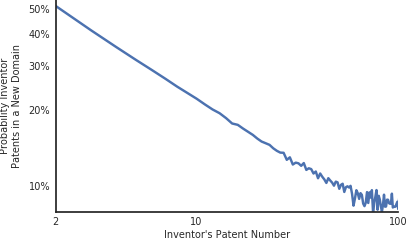

In [13]:
fig = figure(figsize=(fig_one_col,fig_one_col/golden))

ax = fig.add_subplot(1,1,1)

ax = p_entry(ax, patent_data, label='IPC4 (%i classes)'%629)

ax.set_yticks([.1, .2, .3, .4, .5])
ax.set_yticklabels([.1, .2, .3, .4, .5])
ax.set_ylim(ymin=.08, ymax=.55)
ax.yaxis.set_major_formatter(percent_formatter)
# ax.set_ylabel("p(Inventor Patents\nin a New Domain)")
ax.set_ylabel("Probability Inventor\nPatents in a New Domain")

ax.set_xticks([2,10,100])
ax.set_xticklabels([2,10,100])
ax.set_xlabel("Inventor's Patent Number", labelpad=2)


sns.despine()
# fig.tight_layout()
if save_as_manuscript_figures:
    savefig(figures_directory+'movement_frequency.pdf', bbox_inches='tight')

Inventors Move to Related Classes

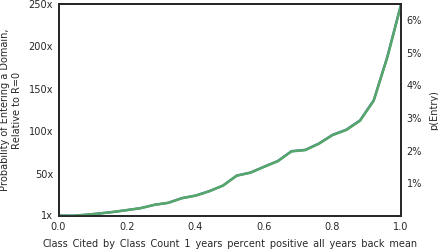

In [14]:
def align_yaxis(ax1, v1, ax2, v2):
    #Code from: http://stackoverflow.com/a/10482477
    """adjust ax2 ylimit so that v2 in ax2 is aligned to v1 in ax1"""
    _, y1 = ax1.transData.transform((0, v1))
    _, y2 = ax2.transData.transform((0, v2))
    inv = ax2.transData.inverted()
    _, dy = inv.transform((0, 0)) - inv.transform((0, y1-y2))
    miny, maxy = ax2.get_ylim()
    ax2.set_ylim(miny+dy, maxy+dy)
    
popularity = 'Class_Patent_Count_1_years_Previous_Year_Percentile'

year = 2010

f = data_directory+'Predictive_Models/PDF/%s/%s/'%(relatedness,popularity)
data = pd.read_hdf(f+'cumulative.h5', 'data/year_%i'%year).astype('float32')
entries = pd.read_hdf(f+'cumulative.h5', 'entries/year_%i'%year).astype('float32')

pdf_r = (entries.groupby(level=[0]).sum()/data.groupby(level=[0]).sum()).fillna(0)
pdf_r.name = 'p(Entry)'

fig = figure(figsize=(fig_one_col,fig_one_col/golden))

ax = fig.add_subplot(1,1,1)
(pdf_r/pdf_r.ix[0]).plot(ax=ax, color='b')
ax.set_ylim(ymax = (pdf_r/pdf_r.ix[0]).max(), ymin=1)
ax.set_yticks([1,50,100,150,200,250])
#ylabel('p(Entry)/p(Entry|R=0)')
ax.set_ylabel("Probability of Entering a Domain,\nRelative to R=0")
ax.yaxis.set_major_formatter(multiple_formatter)
ax2 = twinx(ax)
pdf_r.plot(ax=ax2, color='g')
# ax2.set_ylabel('p(Entry)')
ax2.set_ylim(ymax = pdf_r.max())
ax2.set_ylabel('p(Entry)')
ax2.yaxis.set_major_formatter(percent_formatter)

align_yaxis(ax,1, ax2, pdf_r.ix[0])
xlabel("R (% of Years the Domain was More\nConnected than Expectation to the Inventor's Current Domain)")

In [15]:
print("Total number of Entries: %i"%entries.sum())

Total number of Entries: 1763920


Most Domains are Persistently Less Connected than Expected, but a Few are Persistently More Connected

In [17]:
networks_store = pd.HDFStore(data_directory+'Class_Relatedness_Networks/class_relatedness_networks.h5')

In [18]:
def relabel_classes_in_network(network):
    network.index = classes_lookup.set_index('Class_Name').ix[network.index, 'Class_ID']
    network.columns = classes_lookup.set_index('Class_Name').ix[network.columns, 'Class_ID']
    network = network.ix[classes_lookup['Class_ID'], classes_lookup['Class_ID']]
    for i in network.index:
        network.ix[i,i] = 0
        
def relabel_classes_in_network_panel(network):
    network.major_axis = classes_lookup.set_index('Class_Name').ix[network.major_axis, 'Class_ID']
    network.minor_axis = classes_lookup.set_index('Class_Name').ix[network.minor_axis, 'Class_ID']
    network = network.ix[:, classes_lookup['Class_ID'], classes_lookup['Class_ID']]
    for i in network.items:
        for j in network.major_axis:
            network.ix[i,j,j] = 0
    return network

In [19]:
network_empirical = networks_store['empirical_1_years_IPC4'][relatedness_type]
network_expected = networks_store['randomized_mean_1_years_IPC4'][relatedness_type]

In [20]:
print("Number of Citations Used in Relatedness Network: %i"%network_empirical.sum().sum().sum())

Number of Citations Used in Relatedness Network: 35129936


In [21]:
# from scipy.stats import pearsonr
# r, p = pearsonr(network_empirical.ix[2010].values.ravel(), network_empirical.ix[2010].T.values.ravel())
# print("Correlation between number of citations between two classes in one direction vs. the other direction: %.4f"%r)

In [22]:
from scipy.stats import pearsonr
print("Correlation between number of citations between two classes in one direction vs. the other direction:")
for year in range(1976,2010+1):
    r, p = pearsonr(network_empirical.ix[year].values.ravel(), network_empirical.ix[year].T.values.ravel())
    print("%i: %.3f"%(year, r))

Correlation between number of citations between two classes in one direction vs. the other direction:
1976: 0.795
1977: 0.980
1978: 0.984
1979: 0.990
1980: 0.993
1981: 0.993
1982: 0.993
1983: 0.992
1984: 0.994
1985: 0.995
1986: 0.994
1987: 0.994
1988: 0.995
1989: 0.996
1990: 0.995
1991: 0.995
1992: 0.994
1993: 0.995
1994: 0.996
1995: 0.995
1996: 0.994
1997: 0.993
1998: 0.993
1999: 0.994
2000: 0.993
2001: 0.994
2002: 0.995
2003: 0.995
2004: 0.996
2005: 0.997
2006: 0.996
2007: 0.994
2008: 0.990
2009: 0.988
2010: 0.978


In [23]:
# from scipy.stats import pearsonr
# r, p = pearsonr(networks_store['empirical_IPC4']['Class_Cited_by_Class_Count'].ix[2010].values.ravel(),
#                 networks_store['empirical_IPC4']['Class_Cites_Class_Count'].ix[2010].values.ravel()
#                )

# print("Correlation between number of citations between two classes in one direction vs. the other direction: %.4f"%r)

In [24]:
network_expected = relabel_classes_in_network_panel(network_expected)
network_empirical = relabel_classes_in_network_panel(network_empirical)

In [25]:
network_ratio = network_empirical.divide(network_expected)

In [26]:
n_years = sum(network_empirical.sum().sum()>0)#network_empirical.shape[0]
network_positive_count = (network_empirical>network_expected).cumsum(axis=0).iloc[-1]

for i in network_positive_count.index:
    network_positive_count.ix[i,i] = nan
network_positive_percent = network_positive_count/n_years

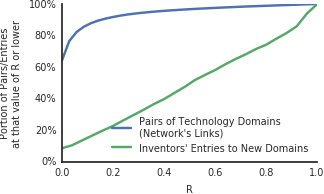

In [27]:
fig = figure(figsize=(fig_one_col,fig_one_col/golden))

ax = fig.add_subplot(1,1,1)

R_frequency_network = pd.value_counts(network_positive_percent.values.ravel()).sort_index()
R_frequency_entries = entries.groupby(level=relatedness).sum()

(R_frequency_network.cumsum()/R_frequency_network.sum()).plot(ax=ax, label="Pairs of Technology Domains\n(Network's Links)")
(R_frequency_entries.cumsum()/R_frequency_entries.sum()).plot(ax=ax, label="Inventors' Entries to New Domains")

ax.set_ylim(0,1)

ax.yaxis.set_major_formatter(percent_formatter)
ax.set_ylabel('Portion of Pairs/Entries\nat that value of R or lower')
ax.set_xlabel('R')
ax.legend(loc='best')
sns.despine()
fig.tight_layout()
if save_as_manuscript_figures:
    savefig(figures_directory+'R_frequencies_in_network_and_entries.pdf', bbox_inches='tight')

In [28]:
always_positive = list(network_positive_count[network_positive_count==n_years].stack().index)
always_negative = list(network_positive_count[network_positive_count==0].stack().index)
in_between = list(network_positive_count[(network_positive_count>0)*(network_positive_count<n_years)].stack().index)

/home/jeffrey_alstott/anaconda3/lib/python3.5/site-packages/pandas/computation/expressions.py:181: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  unsupported[op_str]))


In [29]:
semiconductor = class_data[class_data['Description'].apply(lambda x: 'Semiconductor' in x)].index.values[0]
static_storage = class_data[class_data['Description'].apply(lambda x: 'Static Storage' in x)].index.values[0]
hydraulic = class_data[class_data['Description'].apply(lambda x: 'Hydraulic' in x)].index.values[0]
photography = class_data[class_data['Description'].apply(lambda x: 'Photograph' in x)].index.values[0]

positive_example = (semiconductor, static_storage)
between_example = (semiconductor, photography)
negative_example = (semiconductor, hydraulic)

class_data.ix[semiconductor, 'Description'] = 'Semiconductors'
class_data.ix[static_storage, 'Description'] = 'Static Info Storage'
class_data.ix[hydraulic, 'Description'] = 'Hydraulics'

In [30]:
n_links = prod(network_positive_count.shape)-network_positive_count.shape[0]

In [31]:
R_frequency_entries = R_frequency_entries/R_frequency_entries.sum()

/home/jeffrey_alstott/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


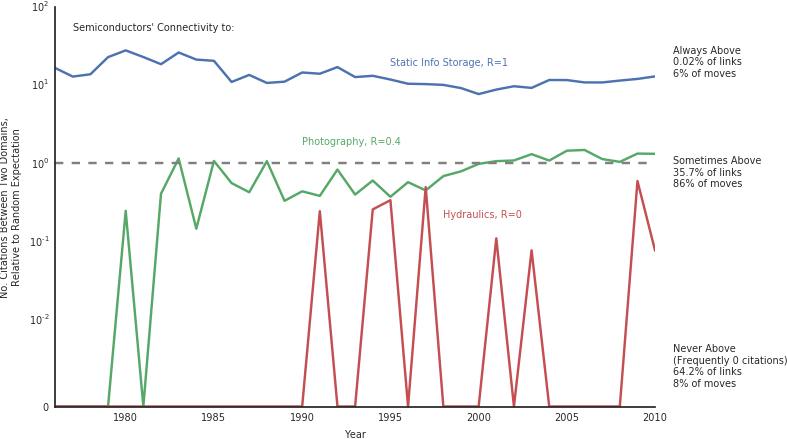

In [32]:
a = network_ratio.ix[:,positive_example[0], positive_example[1]]
a.plot(label='Always More')

n = len(always_positive)/n_links

text(2011, a.iloc[-1], 'Always Above\n'
     '%.2f%% of links\n%.0f%% of moves'%(
                          n*100,
                         R_frequency_entries.ix[1]*100))
b = network_ratio.ix[:,between_example[0], between_example[1]]
b.plot(label='Sometimes More, Sometimes Less')

n = len(in_between)/n_links

text(2011, .5, 'Sometimes Above\n'
     '%.1f%% of links\n%.0f%% of moves'%(
                                                    n*100,
                                                   R_frequency_entries.iloc[1:-1].sum()*100),
    )
n = len(always_negative)/n_links

c = network_ratio.ix[:,negative_example[0], negative_example[1]]
c.plot(label='Always Less')
text(2011, .001, 'Never Above\n(Frequently 0 citations)\n'
     '%.1f%% of links\n%.0f%% of moves\n'
     ''%(
                                n*100,
                               R_frequency_entries.ix[0]*100))


yscale('symlog', linthreshy=.01)
plot(xlim(), (1,1), color='gray', linestyle='--')
xlabel("Year")
#     legend(loc='upper right')#, title="No. Citations Relative to Random Expectation")
sns.despine()
ylabel("No. Citations Between Two Domains,\nRelative to Random Expectation")

text(1977, 50, "%s' Connectivity to:"%class_data.ix[int(negative_example[0]), 'Description'])

text(1995, a.ix[1995]*1.5, "%s, R=1"%(class_data.ix[int(positive_example[1]), 'Description']),# (a>1).mean()),
    color='b')

text(1990, b.ix[1990]*4, "%s, R=%.1f"%(class_data.ix[int(between_example[1]), 'Description'], (b>1).mean()),
    color='g')

text(1998, .2, "%s, R=0"%(class_data.ix[int(negative_example[1]), 'Description']),# (c>1).mean()),
    color='r')

/home/jeffrey_alstott/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


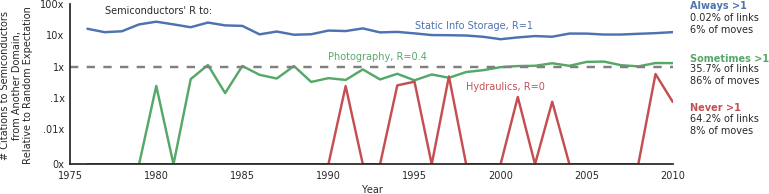

In [33]:
fig = figure(figsize=(fig_two_col,fig_one_col/golden))
ax = fig.add_subplot(1,1,1)

a = network_ratio.ix[:,positive_example[0], positive_example[1]]
ax.plot(a.index, a.values)#a.plot(label='Always More', ax=ax)

n = len(always_positive)/n_links

ax.text(2011, a.iloc[-1]+60, 'Always >1', color='b', fontweight='bold')
ax.text(2011, a.iloc[-1], '%.2f%% of links\n%.0f%% of moves'%(
                          n*100,
                         R_frequency_entries.ix[1]*100))
b = network_ratio.ix[:,between_example[0], between_example[1]]
ax.plot(b.index, b.values)#b.plot(label='Sometimes More, Sometimes Less', ax=ax)

n = len(in_between)/n_links

ax.text(2011, 1.5, 'Sometimes >1', color='g', fontweight='bold')
ax.text(2011, .3, '%.1f%% of links\n%.0f%% of moves'%(
                                                    n*100,
                                                   R_frequency_entries.iloc[1:-1].sum()*100),
    )
n = len(always_negative)/n_links

c = network_ratio.ix[:,negative_example[0], negative_example[1]]
ax.plot(c.index, c.values)#c.plot(label='Always Less', ax=ax)
ax.text(2011, .04, 'Never >1', color='r', fontweight='bold')
ax.text(2011, 0.009, '%.1f%% of links\n%.0f%% of moves'%(
                                n*100,
                               R_frequency_entries.ix[0]*100))


ax.set_yscale('symlog', linthreshy=.01)

ax.plot(ax.get_xlim(), (1,1), color='gray', linestyle='--')
ax.set_xlabel("Year", labelpad=3)
#     legend(loc='upper right')#, title="No. Citations Relative to Random Expectation")
sns.despine(ax=ax)
ax.set_ylabel("# Citations to Semiconductors\nfrom Another Domain,\nRelative to Random Expectation")

ax.text(1977, 50, "%s' R to:"%class_data.ix[int(negative_example[0]), 'Description'])

ax.text(1995, a.ix[1995]*1.5, "%s, R=1"%(class_data.ix[int(positive_example[1]), 'Description']),# (a>1).mean()),
    color='b')

ax.text(1990, b.ix[1990]*4, "%s, R=%.1f"%(class_data.ix[int(between_example[1]), 'Description'], (b>1).mean()),
    color='g')

ax.text(1998, .2, "%s, R=0"%(class_data.ix[int(negative_example[1]), 'Description']),# (c>1).mean()),
    color='r')

ax.set_yticks([0, .01, .1, 1, 10, 100])
ax.set_yticklabels(['0x','.01x', '.1x', '1x', '10x', '100x'])

fig.tight_layout()
if save_as_manuscript_figures:
    savefig(figures_directory+'R_definition.pdf', bbox_inches='tight')

Domains that Many Other Domains Cite Above Expectation in Many Years are Larger

In [34]:
# def find_closest(A, target):
#     #Code for this function from http://stackoverflow.com/a/8929827
#     #A must be sorted
#     idx = A.searchsorted(target)
#     idx = np.clip(idx, 1, len(A)-1)
#     left = A[idx-1]
#     right = A[idx]
#     idx -= target - left < right - target
#     return idx

# network_weighted = network_positive_percent.applymap(lambda x: pdf_r.iloc[find_closest(pdf_r.index.values, x)])
# for i in network_weighted.index:
#     network_weighted.ix[i,i] = 0

In [35]:
# network = network_positive_percent
# these_connections = network[153]
# R = these_connections
# names = class_data.ix[these_connections.index, 'Description']
# pImmigration = network_weighted[153]/pdf_r.iloc[0]
# f = lambda x: .2*x+1.1
# performance = f(R)
# example = pd.DataFrame({'R': R, 'Class': names, 'pImmigration': pImmigration, 'Performance': performance})
# example.sort_values('R', ascending=False, inplace=True)
# example.iloc[:50]

In [45]:
network_R = network_positive_percent.copy()
network_R.index = class_data.ix[network_weighted_for_visualizing.index, 'IPC4']
network_R.columns = class_data.ix[network_weighted_for_visualizing.columns, 'IPC4']
network_R.to_csv(data_directory+'R_network_domain_IPC4_IDs.csv')


network_R = network_positive_percent.copy()
network_R.index = class_data.ix[network_weighted_for_visualizing.index, 'Description']
network_R.columns = class_data.ix[network_weighted_for_visualizing.columns, 'Description']
network_R.to_csv(data_directory+'R_network_domain_description.csv')

In [36]:
network_weighted_for_visualizing = network_positive_percent.copy()
network_weighted_for_visualizing.index = classes_lookup.set_index('Class_ID').ix[network_weighted_for_visualizing.index, 'Class_Name']
network_weighted_for_visualizing.columns = classes_lookup.set_index('Class_ID').ix[network_weighted_for_visualizing.columns, 'Class_Name']

network_weighted_for_visualizing.to_csv(data_directory+'Examples_and_Visualizations/IPC4_network_for_visualizing_directed.csv')

network_weighted_for_visualizing_undirected = (network_weighted_for_visualizing+network_weighted_for_visualizing.T)/2
network_weighted_for_visualizing_undirected.to_csv(data_directory+'Examples_and_Visualizations/IPC4_network_for_visualizing.csv')

network_weighted_for_visualizing_undirected_edgelist = network_weighted_for_visualizing_undirected.copy()
network_weighted_for_visualizing_undirected_edgelist.ix[:,:] = tril(network_weighted_for_visualizing_undirected_edgelist.values)
network_weighted_for_visualizing_undirected_edgelist = network_weighted_for_visualizing_undirected_edgelist[network_weighted_for_visualizing_undirected_edgelist>0].unstack().dropna()

network_weighted_for_visualizing_undirected_edgelist.index.names = ['Source', 'Target']
network_weighted_for_visualizing_undirected_edgelist.name = 'Weight'
network_weighted_for_visualizing_undirected_edgelist = network_weighted_for_visualizing_undirected_edgelist.to_frame()
network_weighted_for_visualizing_undirected_edgelist['Type'] = 'Undirected'
network_weighted_for_visualizing_undirected_edgelist.to_csv(data_directory+'Examples_and_Visualizations/IPC4_network_for_visualizing_edge_list.csv',header=True)

In [16]:
entries = pd.DataFrame(entries).reset_index()

data = pd.DataFrame(data).reset_index()

/home/jeffrey_alstott/anaconda3/lib/python3.5/site-packages/pandas/computation/expressions.py:181: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  unsupported[op_str]))
/home/jeffrey_alstott/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


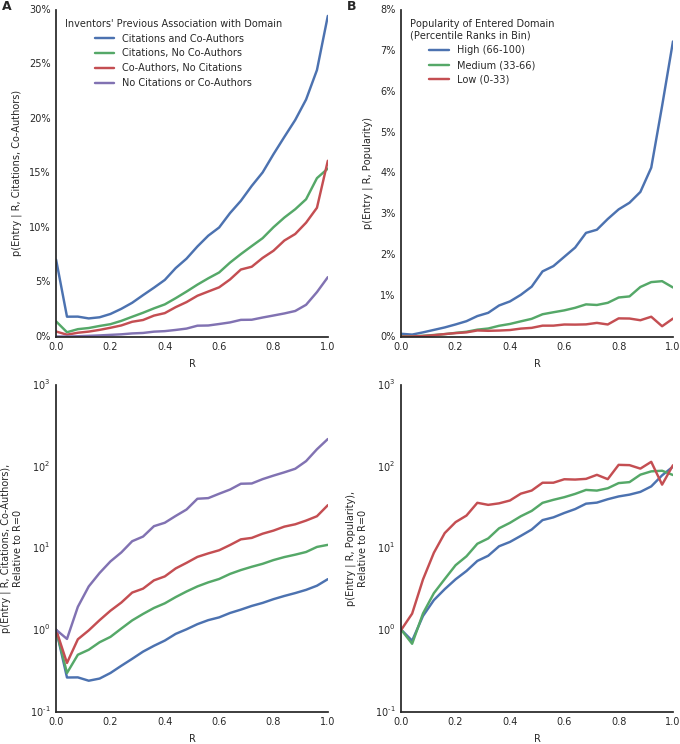

In [47]:
citations = 'Agent_Previous_Citations_to_Class'
coagents = 'CoAgent_Count_in_Class'

fig = figure(figsize=(fig_two_col,fig_two_col*golden*2/3))

n_rows = 2
n_cols = 2
this_ax = 0

annotate_coord = (-.2, 1)
panel_label = "A"


##########
this_ax +=1
ax = fig.add_subplot(n_rows, n_cols, this_ax)

pdf = ((entries.groupby([relatedness,citations, coagents])['Patent'].sum()/
           data.groupby([relatedness, citations, coagents])['Patent'].sum()).fillna(0))
pdf.name = 'p(Entry)'
df = pd.DataFrame(pdf).reset_index()

for name, ind in [('Citations and Co-Authors', (df[citations]==1)*(df[coagents]==1)),
             ('Citations, No Co-Authors', (df[citations]==1)*(df[coagents]==0)),
             ('Co-Authors, No Citations', (df[citations]==0)*(df[coagents]==1)),
             ('No Citations or Co-Authors', (df[citations]==0)*(df[coagents]==0))
            ]:
    this_df = df.ix[ind]
    ax.plot(this_df[relatedness], this_df['p(Entry)'], label=name)
    
ax.set_xlabel("R")
ax.set_ylabel("p(Entry | R, Citations, Co-Authors)")
ax.legend(loc='upper left', title="Inventors' Previous Association with Domain")
sns.despine(ax=ax)
ax.yaxis.set_major_formatter(percent_formatter)
add_panel_label(ax)


#####
pdf = entries.groupby([popularity])['Patent'].sum()/ entries.groupby([popularity])['Patent'].sum().sum()

entries['Popularity_binned'] = digitize(entries[popularity], arange(33,100, 34)/100)
data['Popularity_binned'] = digitize(data[popularity], arange(33,100, 34)/100)


##########
this_ax +=1
ax = fig.add_subplot(n_rows, n_cols, this_ax)

pdf = ((entries.groupby([relatedness,'Popularity_binned'])['Patent'].sum()/
           data.groupby([relatedness, 'Popularity_binned'])['Patent'].sum()).fillna(0))
pdf.name = 'p(Entry)'
df = pd.DataFrame(pdf).reset_index()

thresholds = [0, 1/3, 2/3, 1]

for label, value in [('High', 2),
                  ('Medium', 1),
                  ('Low', 0)]:
    this_df = df[df['Popularity_binned']==value]
    ax.plot(this_df[relatedness], this_df['p(Entry)'], label="%s (%i-%i)"%(label,
                                                                           thresholds[value]*100,
                                                                           thresholds[value+1]*100))
    
ax.set_xlabel("R")
ax.set_ylabel("p(Entry | R, Popularity)")
ax.legend(loc='upper left', title="Popularity of Entered Domain\n(Percentile Ranks in Bin)")
sns.despine(ax=ax)
ax.yaxis.set_major_formatter(percent_formatter)
add_panel_label(ax)



##########
this_ax +=1
ax = fig.add_subplot(n_rows, n_cols, this_ax)

pdf = ((entries.groupby([relatedness,citations, coagents])['Patent'].sum()/
           data.groupby([relatedness, citations, coagents])['Patent'].sum()).fillna(0))
pdf.name = 'p(Entry)'
df = pd.DataFrame(pdf).reset_index()
df['p(Entry)'] = df.groupby(['Agent_Previous_Citations_to_Class', 'CoAgent_Count_in_Class'])['p(Entry)'].apply(lambda x: x/x.iloc[0])

for name, ind in [('Citations and Co-Authors', (df[citations]==1)*(df[coagents]==1)),
             ('Citations, No Co-Authors', (df[citations]==1)*(df[coagents]==0)),
             ('Co-Authors, No Citations', (df[citations]==0)*(df[coagents]==1)),
             ('No Citations or Co-Authors', (df[citations]==0)*(df[coagents]==0))
            ]:
    this_df = df.ix[ind]
    ax.plot(this_df[relatedness], this_df['p(Entry)'], label=name)
    
ax.set_xlabel("R")
ax.set_ylabel("p(Entry | R, Citations, Co-Authors),\nRelative to R=0")
sns.despine(ax=ax)
ax.yaxis.set_major_formatter(percent_formatter)
ax.set_yscale('log')


#####
pdf = entries.groupby([popularity])['Patent'].sum()/ entries.groupby([popularity])['Patent'].sum().sum()

entries['Popularity_binned'] = digitize(entries[popularity], arange(33,100, 34)/100)
data['Popularity_binned'] = digitize(data[popularity], arange(33,100, 34)/100)

##########
this_ax +=1
ax = fig.add_subplot(n_rows, n_cols, this_ax)

pdf = ((entries.groupby([relatedness,'Popularity_binned'])['Patent'].sum()/
           data.groupby([relatedness, 'Popularity_binned'])['Patent'].sum()).fillna(0))
pdf.name = 'p(Entry)'
pdf = pdf/pdf.ix[0]
df = pd.DataFrame(pdf).reset_index()

thresholds = [0, 1/3, 2/3, 1]

for label, value in [('High', 2),
                  ('Medium', 1),
                  ('Low', 0)]:
    this_df = df[df['Popularity_binned']==value]
    ax.plot(this_df[relatedness], this_df['p(Entry)'], label="%s (%i-%i)"%(label,
                                                                           thresholds[value]*100,
                                                                           thresholds[value+1]*100))
    
ax.set_xlabel("R")
ax.set_ylabel("p(Entry | R, Popularity),\nRelative to R=0")
sns.despine(ax=ax)
ax.yaxis.set_major_formatter(percent_formatter)
ax.set_yscale('log')

####
# figs.append(fig)
fig.tight_layout()
if save_as_manuscript_figures:
    savefig(figures_directory+'R_pdf_with_conditions.pdf', bbox_inches='tight')

/home/jeffrey_alstott/anaconda3/lib/python3.5/site-packages/pandas/computation/expressions.py:181: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  unsupported[op_str]))


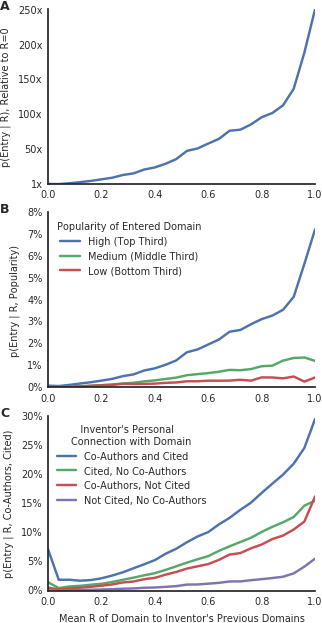

In [48]:
citations = 'Agent_Previous_Citations_to_Class'
coagents = 'CoAgent_Count_in_Class'

fig = figure(figsize=(fig_one_col,3*fig_one_col/golden))

n_rows = 3
n_cols = 1
this_ax = 0

annotate_coord = (-.18, 1)
panel_label = "A"

##########
this_ax +=1
ax = fig.add_subplot(n_rows, n_cols, this_ax)

(pdf_r/pdf_r.ix[0]).plot(ax=ax)
ax.set_ylim(ymax = (pdf_r/pdf_r.ix[0]).max(), ymin=1)
ax.set_yticks([1,50,100,150,200,250])
# ax.set_ylabel("Probability of Inventor\nEntering a Domain,\nRelative to R=0")
ax.set_ylabel("p(Entry | R), Relative to R=0")
ax.yaxis.set_major_formatter(multiple_formatter)
# ax.set_xlabel("Mean R of Domain to Inventor's Previous Domains")
ax.set_xlabel("")
sns.despine(ax=ax)

add_panel_label(ax)

#####
pdf = entries.groupby([popularity])['Patent'].sum()/ entries.groupby([popularity])['Patent'].sum().sum()

entries['Popularity_binned'] = digitize(entries[popularity], arange(33,100, 34)/100)
data['Popularity_binned'] = digitize(data[popularity], arange(33,100, 34)/100)


##########
this_ax +=1
ax = fig.add_subplot(n_rows, n_cols, this_ax)

pdf = ((entries.groupby([relatedness,'Popularity_binned'])['Patent'].sum()/
           data.groupby([relatedness, 'Popularity_binned'])['Patent'].sum()).fillna(0))
pdf.name = 'p(Entry)'
df = pd.DataFrame(pdf).reset_index()

thresholds = [0, 1/3, 2/3, 1]

for label, value in [('High (Top Third)', 2),
                  ('Medium (Middle Third)', 1),
                  ('Low (Bottom Third)', 0)]:
    this_df = df[df['Popularity_binned']==value]
    ax.plot(this_df[relatedness], this_df['p(Entry)'], label="%s"%(label))
#     ax.plot(this_df[relatedness], this_df['p(Entry)'], label="%s (%i-%i)"%(label,
#                                                                            thresholds[value]*100,
#                                                                            thresholds[value+1]*100))
    
# ax.set_xlabel("R")
ax.set_ylabel("p(Entry | R, Popularity)")
ax.legend(loc='upper left', title="Popularity of Entered Domain")#\n(Percentile Ranks in Bin)")
sns.despine(ax=ax)
ax.yaxis.set_major_formatter(percent_formatter)
add_panel_label(ax)

##########
this_ax +=1
ax = fig.add_subplot(n_rows, n_cols, this_ax)

pdf = ((entries.groupby([relatedness,citations, coagents])['Patent'].sum()/
           data.groupby([relatedness, citations, coagents])['Patent'].sum()).fillna(0))
pdf.name = 'p(Entry)'
df = pd.DataFrame(pdf).reset_index()

for name, ind in [('Co-Authors and Cited', (df[citations]==1)*(df[coagents]==1)),
             ('Cited, No Co-Authors', (df[citations]==1)*(df[coagents]==0)),
             ('Co-Authors, Not Cited', (df[citations]==0)*(df[coagents]==1)),
             ('Not Cited, No Co-Authors', (df[citations]==0)*(df[coagents]==0))
            ]:
    this_df = df.ix[ind]
    ax.plot(this_df[relatedness], this_df['p(Entry)'], label=name)
    
# ax.set_xlabel("Mean R of Domain to Inventor's Previous Domains")
ax.set_ylabel("p(Entry | R, Co-Authors, Cited)")
ax.legend(loc='upper left', title="   Inventor's Personal\nConnection with Domain")
sns.despine(ax=ax)
ax.yaxis.set_major_formatter(percent_formatter)
add_panel_label(ax)
ax.set_xlabel("Mean R of Domain to Inventor's Previous Domains")


fig.tight_layout()
if save_as_manuscript_figures:
    savefig(figures_directory+'R_pdf.pdf', bbox_inches='tight')

/home/jeffrey_alstott/anaconda3/lib/python3.5/site-packages/pandas/computation/expressions.py:181: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  unsupported[op_str]))
/home/jeffrey_alstott/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


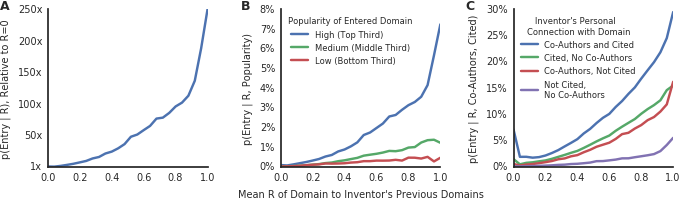

In [49]:
citations = 'Agent_Previous_Citations_to_Class'
coagents = 'CoAgent_Count_in_Class'

fig = figure(figsize=(fig_two_col,fig_one_col/golden))

n_rows = 1
n_cols = 3
this_ax = 0

annotate_coord = (-.3, 1)
panel_label = "A"

##########
this_ax +=1
ax = fig.add_subplot(n_rows, n_cols, this_ax)

(pdf_r/pdf_r.ix[0]).plot(ax=ax)
ax.set_ylim(ymax = (pdf_r/pdf_r.ix[0]).max(), ymin=1)
ax.set_yticks([1,50,100,150,200,250])
# ax.set_ylabel("Probability of Inventor\nEntering a Domain,\nRelative to R=0")
ax.set_ylabel("p(Entry | R), Relative to R=0")
ax.yaxis.set_major_formatter(multiple_formatter)
# ax.set_xlabel("Mean R of Domain to Inventor's Previous Domains")
ax.set_xlabel("")
sns.despine(ax=ax)

add_panel_label(ax)

#####
pdf = entries.groupby([popularity])['Patent'].sum()/ entries.groupby([popularity])['Patent'].sum().sum()

entries['Popularity_binned'] = digitize(entries[popularity], arange(33,100, 34)/100)
data['Popularity_binned'] = digitize(data[popularity], arange(33,100, 34)/100)


##########
annotate_coord = (-.25, 1)

this_ax +=1
ax = fig.add_subplot(n_rows, n_cols, this_ax)

pdf = ((entries.groupby([relatedness,'Popularity_binned'])['Patent'].sum()/
           data.groupby([relatedness, 'Popularity_binned'])['Patent'].sum()).fillna(0))
pdf.name = 'p(Entry)'
df = pd.DataFrame(pdf).reset_index()

thresholds = [0, 1/3, 2/3, 1]

for label, value in [('High (Top Third)', 2),
                  ('Medium (Middle Third)', 1),
                  ('Low (Bottom Third)', 0)]:
    this_df = df[df['Popularity_binned']==value]
    ax.plot(this_df[relatedness], this_df['p(Entry)'], label="%s"%(label))
#     ax.plot(this_df[relatedness], this_df['p(Entry)'], label="%s (%i-%i)"%(label,
#                                                                            thresholds[value]*100,
#                                                                            thresholds[value+1]*100))
    
# ax.set_xlabel("R")
ax.set_xlabel("Mean R of Domain to Inventor's Previous Domains")
ax.set_ylabel("p(Entry | R, Popularity)")
l = ax.legend(loc='upper left', title="Popularity of Entered Domain", fontsize=6)#\n(Percentile Ranks in Bin)")
plt.setp(l.get_title(),fontsize=6)
sns.despine(ax=ax)
ax.yaxis.set_major_formatter(percent_formatter)
add_panel_label(ax)

##########
annotate_coord = (-.3, 1)

this_ax +=1
ax = fig.add_subplot(n_rows, n_cols, this_ax)

pdf = ((entries.groupby([relatedness,citations, coagents])['Patent'].sum()/
           data.groupby([relatedness, citations, coagents])['Patent'].sum()).fillna(0))
pdf.name = 'p(Entry)'
df = pd.DataFrame(pdf).reset_index()

for name, ind in [('Co-Authors and Cited', (df[citations]==1)*(df[coagents]==1)),
             ('Cited, No Co-Authors', (df[citations]==1)*(df[coagents]==0)),
             ('Co-Authors, Not Cited', (df[citations]==0)*(df[coagents]==1)),
             ('Not Cited,\nNo Co-Authors', (df[citations]==0)*(df[coagents]==0))
            ]:
    this_df = df.ix[ind]
    ax.plot(this_df[relatedness], this_df['p(Entry)'], label=name)
    
# ax.set_xlabel("Mean R of Domain to Inventor's Previous Domains")
ax.set_ylabel("p(Entry | R, Co-Authors, Cited)")
l = ax.legend(loc='upper left', title="   Inventor's Personal\nConnection with Domain", fontsize=6)
plt.setp(l.get_title(),fontsize=6)
sns.despine(ax=ax)
ax.yaxis.set_major_formatter(percent_formatter)
add_panel_label(ax)

fig.tight_layout()
if save_as_manuscript_figures:
    savefig(figures_directory+'R_pdf_horizontal.pdf', bbox_inches='tight')

Guide Dynamics
====

In [47]:
target = 'entries_with_predictions_NB_4D'

store = pd.HDFStore(data_directory+'Agent_Entries/agent_%s_%s.h5'%(target, class_system), mode='r')
entries = store['%s_%s'%(target, class_system)]
store.close()

In [48]:
n_authors = patent_data['Patent'].value_counts()
entries['N_Authors'] = n_authors.ix[entries['Patent']].values
entries['N_Co_Authors'] = entries['N_Authors']-1

n_new_authors = entries['Patent'].value_counts()
entries['N_New_Authors'] = n_new_authors.ix[entries['Patent']].values

entries['N_New_Co_Authors'] = entries['N_New_Authors']-1

entries['All_Explorer'] = entries['N_New_Authors']==entries['N_Authors']
entries['Guided'] = 1-entries['All_Explorer']

/home/jeffrey_alstott/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


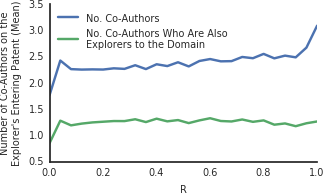

In [54]:
fig = figure(figsize=(fig_one_col,fig_one_col/golden))

entries.groupby(relatedness)['N_Co_Authors'].mean().plot(label='No. Co-Authors')
entries.groupby(relatedness)['N_New_Co_Authors'].mean().plot(label='No. Co-Authors Who Are Also\nExplorers to the Domain')

ylabel("Number of Co-Authors on the\nExplorer's Entering Patent (Mean)")
xlabel("R")
legend(loc='upper left')


sns.despine()
figs.append(fig)
fig.tight_layout()

if save_as_manuscript_figures:
    savefig(figures_directory+'N_co-authors_by_R.pdf', bbox_inches='tight')

In [56]:
mean_guided = entries['Guided'].mean()
print("%.0f%% of entries had a guide."%(100*mean_guided))

55% of entries had a guide.


In [78]:
entries[(entries['N_Co_Authors']>0)*(entries['Guided']==0)].shape[0]/entries.shape[0]

/home/jeffrey_alstott/anaconda3/lib/python3.5/site-packages/pandas/computation/expressions.py:181: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  unsupported[op_str]))


0.2635567524667029

/home/jeffrey_alstott/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


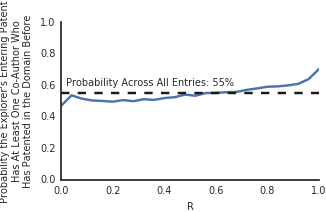

In [67]:
fig = figure(figsize=(fig_one_col,fig_one_col/golden))

entries.groupby(relatedness)['Guided'].mean().plot()
ylabel("Probability the Explorer's Entering Patent\nHas At Least One Co-Author Who\nHas Patented in the Domain Before")
xlabel("R")
ylim(0,1)
# title("People Often Explore with A Co-Author\nThat Has Previously Published in the Domain,\n"
#       "But They're More Likely to Not Have a Guide in a Less Related Domain")
plot((0,1), (mean_guided,mean_guided), 'k--', label="Probability Across All Entries: %.0f%%"%(100*mean_guided))
text(.02, mean_guided+.05, "Probability Across All Entries: %.0f%%"%(100*mean_guided))
# legend(loc='lower right')

sns.despine()
figs.append(fig)
fig.tight_layout()

if save_as_manuscript_figures:
    savefig(figures_directory+'p(Guide)_by_R.pdf', bbox_inches='tight')

In [60]:
# class_agent_count_by_year = patent_data.groupby(['Application_Year', 'Class_ID'])['Agent'].nunique()
# agent_count_by_year = class_agent_count_by_year.groupby(level='Application_Year').sum()

# coauthor_availability_year_class = (class_agent_count_by_year/agent_count_by_year).ix[pd.Index(zip(entries['Application_Year'], entries['Class_ID']))]

# p_guide = 1-((1-coauthor_availability_year_class.values)**entries['N_Co_Authors'])

# entries.groupby(relatedness)['Guided'].mean().plot(color='g')
# twinx()
# p_guide.groupby(entries[relatedness]).mean().plot()
# figure()
# (entries.groupby(relatedness)['Guided'].mean()/p_guide.groupby(entries[relatedness]).mean()).plot()

In [68]:
max_relatedness = entries.groupby('Patent')[relatedness].max()

entries['Max_Relatedness_Among_Authors'] = max_relatedness.ix[entries['Patent']].values

mean_max_r = entries.ix[(entries['All_Explorer'] *
            (entries['N_Authors']>1)
            )].groupby(relatedness)['Max_Relatedness_Among_Authors'].mean()

median_max_r = entries.ix[(entries['All_Explorer'] *
            (entries['N_Authors']>1)
            )].groupby(relatedness)['Max_Relatedness_Among_Authors'].median()

entries['Max_Relatedness_Among_Authors_Guided_as_1'] = maximum(entries['Max_Relatedness_Among_Authors'],
                                                               entries['Guided'])

/home/jeffrey_alstott/anaconda3/lib/python3.5/site-packages/pandas/computation/expressions.py:181: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  unsupported[op_str]))


/home/jeffrey_alstott/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


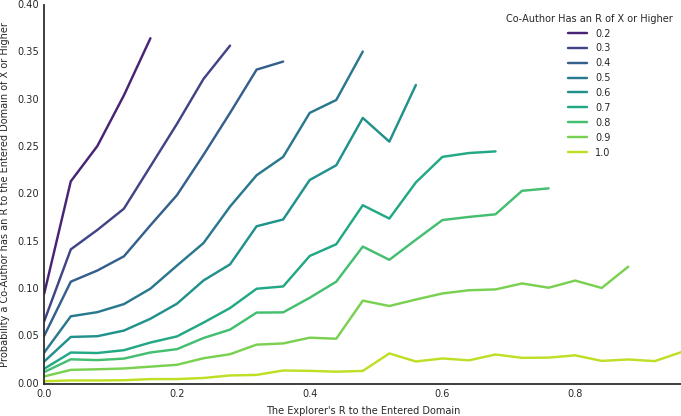

In [82]:
fig = figure(figsize=(fig_two_col,fig_two_col/golden))

thresholds = arange(.2, 1.1, .1)

with sns.color_palette('viridis', len(thresholds)):
    for thr in thresholds:
        entries[entries['Guided']==0].groupby(relatedness).apply(lambda x: mean(x['Max_Relatedness_Among_Authors']>=thr)).ix[:(thr-.001)].plot(label=thr)
legend(loc='upper right', title="Co-Author Has an R of X or Higher")
ylabel("Probability a Co-Author has an R to the Entered Domain of X or Higher")
xlabel("The Explorer's R to the Entered Domain")

sns.despine()

figs.append(fig)
fig.tight_layout()

if save_as_manuscript_figures:
    savefig(figures_directory+'p(Co-Author_R_Greater_than_X)_by_R.pdf', bbox_inches='tight')

/home/jeffrey_alstott/anaconda3/lib/python3.5/site-packages/pandas/computation/expressions.py:181: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  unsupported[op_str]))
/home/jeffrey_alstott/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


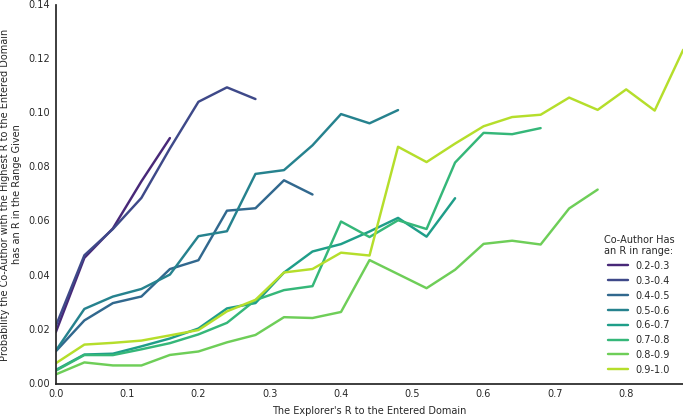

In [83]:
fig = figure(figsize=(fig_two_col,fig_two_col/golden))
thresholds = arange(.2, 1, .1)

with sns.color_palette('viridis', len(thresholds)):
    for thr in thresholds:
        entries[entries['Guided']==0].groupby(relatedness).apply(lambda x: mean((x['Max_Relatedness_Among_Authors']>thr)*
                                                          (x['Max_Relatedness_Among_Authors']<=(thr+.1)))).ix[:(thr-.001)].plot(label='%.1f-%.1f'%(thr,thr+.1))
legend(loc='lower right', title="Co-Author Has\nan R in range:")
ylabel("Probability the Co-Author with the Highest R to the Entered Domain\nhas an R in the Range Given")
xlabel("The Explorer's R to the Entered Domain")
sns.despine()

figs.append(fig)
fig.tight_layout()

if save_as_manuscript_figures:
    savefig(figures_directory+'p(Co-Author_R_within_X)_by_R.pdf', bbox_inches='tight')

/home/jeffrey_alstott/anaconda3/lib/python3.5/site-packages/pandas/computation/expressions.py:181: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  unsupported[op_str]))


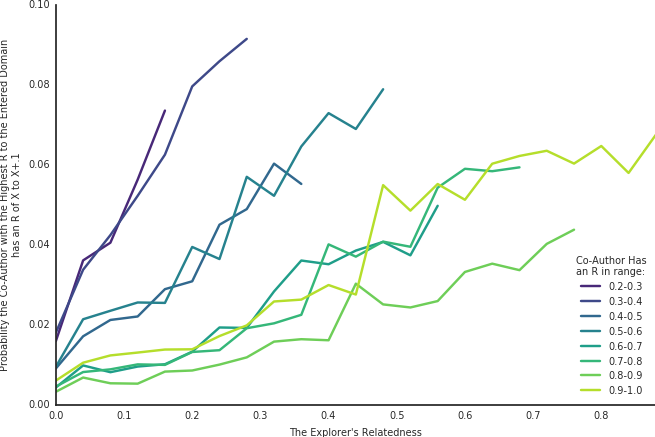

In [125]:
thresholds = arange(.2, 1, .1)

with sns.color_palette('viridis', len(thresholds)):
    for thr in thresholds:
        entries[entries['N_Co_Authors']==1].groupby(relatedness).apply(lambda x: mean((x['Max_Relatedness_Among_Authors']>thr)*
                                                          (x['Max_Relatedness_Among_Authors']<=(thr+.1)))).ix[:(thr-.001)].plot(label='%.1f-%.1f'%(thr,thr+.1))
legend(loc='lower right', title="Co-Author Has\nan R in range:")
ylabel("Probability the Co-Author with the Highest R to the Entered Domain\nhas an R of X to X+.1")
xlabel("The Explorer's Relatedness")
sns.despine()

/home/jeffrey_alstott/anaconda3/lib/python3.5/site-packages/pandas/computation/expressions.py:181: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  unsupported[op_str]))


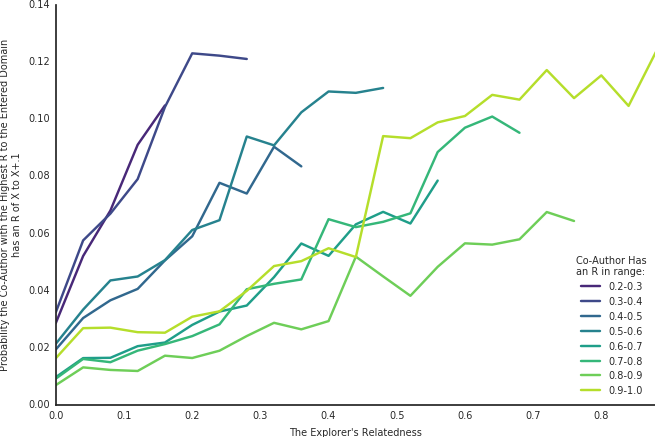

In [126]:
thresholds = arange(.2, 1, .1)

with sns.color_palette('viridis', len(thresholds)):
    for thr in thresholds:
        entries[entries['N_Co_Authors']==2].groupby(relatedness).apply(lambda x: mean((x['Max_Relatedness_Among_Authors']>thr)*
                                                          (x['Max_Relatedness_Among_Authors']<=(thr+.1)))).ix[:(thr-.001)].plot(label='%.1f-%.1f'%(thr,thr+.1))
legend(loc='lower right', title="Co-Author Has\nan R in range:")
ylabel("Probability the Co-Author with the Highest R to the Entered Domain\nhas an R of X to X+.1")
xlabel("The Explorer's Relatedness")
sns.despine()

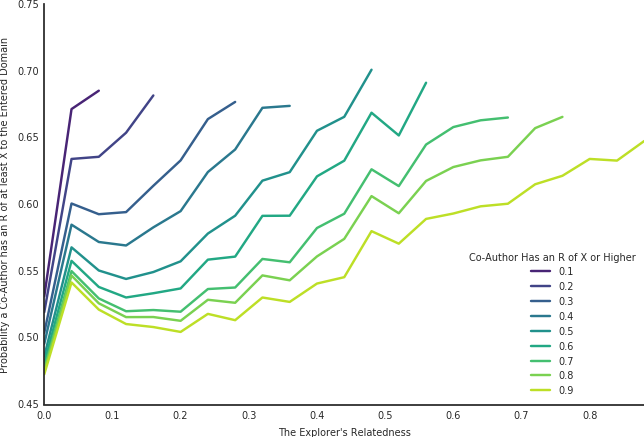

In [74]:
thresholds = arange(.1, 1, .1)

with sns.color_palette('viridis', len(thresholds)):
    for thr in thresholds:
        entries.groupby(relatedness).apply(lambda x: mean(x['Max_Relatedness_Among_Authors_Guided_as_1']>=thr)).ix[:thr].plot(label=thr)
legend(loc='lower right', title="Co-Author Has an R of X or Higher")
ylabel("Probability a Co-Author has an R of at least X to the Entered Domain")
xlabel("The Explorer's Relatedness")
ylim(0.45, 0.75)
sns.despine()

In [46]:
entries['Relatedness'] = entries[relatedness]

n_bins = 10
entries['Relatedness_binned'] = entries['Relatedness']
entries.ix[(entries[relatedness]==0), 'Relatedness_binned'] = -1
entries['Relatedness_binned'] = digitize(entries['Relatedness_binned'], arange(n_bins)/n_bins)/n_bins   

/home/jeffrey_alstott/anaconda3/lib/python3.5/site-packages/pandas/computation/expressions.py:181: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  unsupported[op_str]))


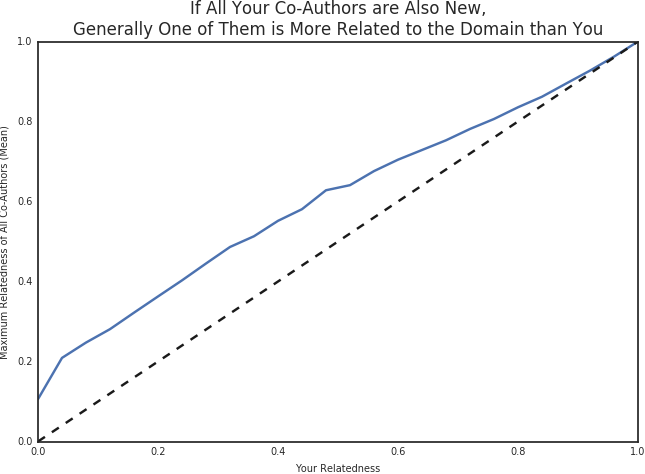

In [40]:
entries.ix[(entries['All_Explorer'] *
            (entries['N_Authors']>1)
            )].groupby(relatedness)['Max_Relatedness_Among_Authors'].mean().plot()
ylabel("Maximum Relatedness of All Co-Authors (Mean)")
xlabel("Your Relatedness")
plot((0,1), (0,1), 'k--')
title("If All Your Co-Authors are Also New,\nGenerally One of Them is More Related to the Domain than You")

Movement Prediction
====

In [50]:
target = 'entries_with_predictions_NB_4D'

store = pd.HDFStore(data_directory+'Agent_Entries/agent_%s_%s.h5'%(target, class_system), mode='r')
entries = store['%s_%s'%(target, class_system)]
store.close()

In [51]:
model_years = [1980, 1990, 2000]

1980
Application_Year
1981.0    0.972625
1982.0    0.972843
1983.0    0.974522
1984.0    0.974441
1985.0    0.974522
1986.0    0.976077
1987.0    0.976115
1988.0    0.977707
1989.0    0.979266
1990.0    0.980769
1991.0    0.979299
1992.0    0.980831
1993.0    0.980892
1994.0    0.982428
1995.0    0.984000
1996.0    0.982428
1997.0    0.983819
1998.0    0.982484
1999.0    0.982484
2000.0    0.982484
2001.0    0.982484
2002.0    0.980892
2003.0    0.980861
2004.0    0.980892
2005.0    0.980892
2006.0    0.980861
2007.0    0.979299
2008.0    0.980831
2009.0    0.985646
2010.0    0.982456
Name: Prediction_Rank_from_1980_NB_4D_with_Class_Cited_by_Class_Count_1_years_percent_positive_all_years_back_mean_and_Class_Patent_Count_1_years_Previous_Year_Percentile, dtype: float32
Application_Year
1981.0    0.886637
1982.0    0.897809
1983.0    0.905169
1984.0    0.903006
1985.0    0.905842
1986.0    0.908908
1987.0    0.909505
1988.0    0.912910
1989.0    0.917684
1990.0    0.918767
1991.0    0.92

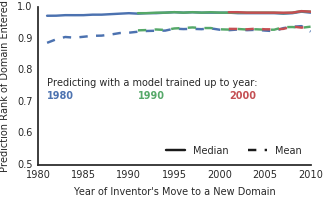

In [52]:
fig = figure(figsize=(fig_one_col,fig_one_col/golden))

for model_year in model_years:
    print(model_year)
    column_label = '%i_NB_4D_with_%s_and_%s'%(model_year, relatedness, popularity)
    q = entries.groupby('Application_Year')['Prediction_Rank_from_'+column_label].median()[model_year+1:]
    p, = plot(q.index, q.values, linestyle='-')
    print(q)


    q = entries.groupby('Application_Year')['Prediction_Rank_from_'+column_label].mean()[model_year+1:]
    p, = plot(q.index, q.values, linestyle='--', color=p.get_color())
    print(q)
    text(model_year+1, .71, "%i"%model_year, color=p.get_color(), fontweight='bold')
text(1981, .75, "Predicting with a model trained up to year:")
ylim(.5,1)


plot([],[], linestyle='-', color='k', label='Median')
plot([],[], linestyle='--', color='k', label='Mean')
legend(loc='lower right', ncol=2)#, title="Prediction Rank of Domain Entered")

plot([],[], )
plot([],[], linestyle='--', color='k', label='Mean')

ylabel("Prediction Rank of Domain Entered")
xlabel("Year of Inventor's Move to a New Domain")
sns.despine()

figs.append(fig)
fig.tight_layout()

if save_as_manuscript_figures:
    savefig(figures_directory+'prediction_ranks.pdf', bbox_inches='tight')

In [53]:
fig = figure(figsize=(fig_two_col,fig_two_col/golden/2))

n_rows = 1
n_cols = 2
this_ax = 0

annotate_coord = (-.2, 1)
panel_label = "A"


##########
this_ax +=1
ax = fig.add_subplot(n_rows, n_cols, this_ax)

from sklearn.metrics import auc
import powerlaw
f = lambda x: auc(*powerlaw.ccdf(x))
def f(x):
    try:
        return auc(*powerlaw.ccdf(x))
    except:
        return nan
    
for model_year in model_years:
    column_label = '%i_NB_4D_with_%s_and_%s'%(model_year, relatedness, popularity)
    q = entries.groupby('Application_Year')['Prediction_Rank_from_'+column_label].agg(f)[model_year+1:]
    p, = ax.plot(q.index, q.values, linestyle='-')

    text(model_year+1, .71, "%i"%model_year, color=p.get_color(), fontweight='bold')
text(1981, .75, "Predicting with a model trained up to year:")
ylim(.5,1)    
sns.despine(ax=ax)
ax.set_ylim(.5,1)
ax.set_ylabel("c-statistic\n(Area Under ROC Curve)")
ax.set_xlabel("Year of Inventor's Move to a New Domain")
add_panel_label(ax)


##########
this_ax +=1
ax = fig.add_subplot(n_rows, n_cols, this_ax)
for model_year in model_years:
    column_label = '%i_NB_4D_with_%s_and_%s'%(model_year, relatedness, popularity)
    q = entries.groupby('Application_Year')['Prediction_log_loss_from_'+column_label].mean()[model_year+1:]
    p, = ax.plot(q.index, q.values, linestyle='-')
    text(model_year+1, .007, "%i"%model_year, color=p.get_color(), fontweight='bold')
text(1981, .008, "Predicting with a model trained up to year:")
ylim(ymin=0)    
ax.set_ylim(ymin=0)
sns.despine(ax=ax)
ax.set_ylabel("Log-loss")
ax.set_xlabel("Year of Inventor's Move to a New Domain")
add_panel_label(ax)

tight_layout()
figs.append(fig)

if save_as_manuscript_figures:
    savefig(figures_directory+'prediction_quality_other_measures.pdf')

NameError: name 'fig_three_col' is not defined

In [ ]:
fig = figure(figsize=(fig_three_col,fig_three_col*golden/3))

import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(2, 8)
ax1 = plt.subplot(gs[0, :7])
ax2 = plt.subplot(gs[1,0:4])
ax3 = plt.subplot(gs[1, 4:])


annotate_coord = (-.12, 1)
panel_label = "A"

#######
ax = ax1

a = network_ratio.ix[:,positive_example[0], positive_example[1]]
ax.plot(a.index, a.values)#a.plot(label='Always More', ax=ax)

n = len(always_positive)/n_links

ax.text(2011, a.iloc[-1]+60, 'Always >1', color='b', fontweight='bold')
ax.text(2011, a.iloc[-1], '%.2f%% of links\n%.0f%% of moves'%(
                          n*100,
                         R_frequency_entries.ix[1]*100))
b = network_ratio.ix[:,between_example[0], between_example[1]]
ax.plot(b.index, b.values)#b.plot(label='Sometimes More, Sometimes Less', ax=ax)

n = len(in_between)/n_links

ax.text(2011, 1.5, 'Sometimes >1', color='g', fontweight='bold')
ax.text(2011, .3, '%.1f%% of links\n%.0f%% of moves'%(
                                                    n*100,
                                                   R_frequency_entries.iloc[1:-1].sum()*100),
    )
n = len(always_negative)/n_links

c = network_ratio.ix[:,negative_example[0], negative_example[1]]
ax.plot(c.index, c.values)#c.plot(label='Always Less', ax=ax)
ax.text(2011, .04, 'Never >1', color='r', fontweight='bold')
ax.text(2011, 0.009, '%.1f%% of links\n%.0f%% of moves'%(
                                n*100,
                               R_frequency_entries.ix[0]*100))


ax.set_yscale('symlog', linthreshy=.01)

ax.plot(ax.get_xlim(), (1,1), color='gray', linestyle='--')
ax.set_xlabel("Year", labelpad=3)
#     legend(loc='upper right')#, title="No. Citations Relative to Random Expectation")
sns.despine(ax=ax)
ax.set_ylabel("# Citations\nBetween Two Domains,\nRelative to Random Expectation")

ax.text(1977, 50, "%s' R to:"%class_data.ix[int(negative_example[0]), 'Description'])

ax.text(1995, a.ix[1995]*1.5, "%s, R=1"%(class_data.ix[int(positive_example[1]), 'Description']),# (a>1).mean()),
    color='b')

ax.text(1990, b.ix[1990]*4, "%s, R=%.1f"%(class_data.ix[int(between_example[1]), 'Description'], (b>1).mean()),
    color='g')

ax.text(1998, .2, "%s, R=0"%(class_data.ix[int(negative_example[1]), 'Description']),# (c>1).mean()),
    color='r')

ax.set_yticks([0, .01, .1, 1, 10, 100])
ax.set_yticklabels(['0x','.01x', '.1x', '1x', '10x', '100x'])

add_panel_label(ax)

#######
ax = ax2    

(pdf_r/pdf_r.ix[0]).plot(ax=ax)
ax.set_ylim(ymax = (pdf_r/pdf_r.ix[0]).max(), ymin=1)
ax.set_yticks([1,50,100,150,200,250])
ax.set_ylabel("Probability of Inventor\nEntering a Domain,\nRelative to R=0")
ax.yaxis.set_major_formatter(multiple_formatter)
ax.set_xlabel("Mean R of Domain to Inventor's Previous Domains")
sns.despine(ax=ax)

annotate_coord = (-.2, 1)
add_panel_label(ax)

########
ax = ax3
for model_year in model_years:
    column_label = '%i_NB_4D_with_%s_and_%s'%(model_year, relatedness, popularity)
    q = entries.groupby('Application_Year')['Prediction_Rank_from_'+column_label].median()[model_year+1:]
    p, = ax.plot(q.index, q.values, linestyle='-')


    q = entries.groupby('Application_Year')['Prediction_Rank_from_'+column_label].mean()[model_year+1:]
    p, = ax.plot(q.index, q.values, linestyle='--', color=p.get_color())
    text(model_year+1, .71, "%i"%model_year, color=p.get_color(), fontweight='bold')
ax.text(1981, .75, "Predicting with a model trained up to year:")
ax.set_ylim(.5,1)


ax.plot([],[], linestyle='-', color='k', label='Median')
ax.plot([],[], linestyle='--', color='k', label='Mean')
ax.legend(loc='lower right', ncol=2)#, title="Prediction Rank of Domain Entered")

ax.plot([],[], )
ax.plot([],[], linestyle='--', color='k', label='Mean')

ax.set_ylabel("Prediction Rank\nof Domain Entered")
ax.set_xlabel("Year of Inventor's Move to a New Domain")

sns.despine(ax=ax)
annotate_coord = (-.15, 1)
add_panel_label(ax)



######
#     fig.tight_layout()
gs.tight_layout(fig)
gs.update(hspace=0.35, wspace=3)
figs.append(fig)

if save_as_manuscript_figures:
    savefig(figures_directory+'empirical_statistics.pdf')

Movement Performance
====

In [8]:
entries = pd.read_hdf(data_directory+'Performance_Models/entries_for_performance_analysis.h5', 'entries')

In [9]:
def outcome_ratio_in_group(x, performance, reference_group):
    return pd.Series(x[performance].values/x[performance+'_Mean_'+reference_group].values)

In [10]:
entries['Relatedness'] = entries[relatedness]

n_bins = 10
entries['Relatedness_binned'] = entries['Relatedness']
entries.ix[(entries[relatedness]==0), 'Relatedness_binned'] = -1
entries['Relatedness_binned'] = digitize(entries['Relatedness_binned'], arange(n_bins)/n_bins)/n_bins   

grouper = entries.groupby('Relatedness_binned')

In [11]:
reference_group = 'for_Year_and_Class_of_New_Immigrants_to_Class'
performance_given_R_dict = {}

performance = 'Agent_Number_of_Patents_in_Class'
m = grouper.apply(lambda x: outcome_ratio_in_group(x, performance, reference_group).replace([inf, -inf], [nan, nan]).dropna().mean())
s = grouper.apply(lambda x: outcome_ratio_in_group(x, performance, reference_group).replace([inf, -inf], [nan, nan]).dropna().sem())
performance_given_R_dict[performance] = {}
performance_given_R_dict[performance]['m'] = m
performance_given_R_dict[performance]['s'] = s

performance = 'Agent_Number_of_Citations_in_Class'
m = grouper.apply(lambda x: outcome_ratio_in_group(x, performance, reference_group).replace([inf, -inf], [nan, nan]).dropna().mean())
s = grouper.apply(lambda x: outcome_ratio_in_group(x, performance, reference_group).replace([inf, -inf], [nan, nan]).dropna().sem())
performance_given_R_dict[performance] = {}
performance_given_R_dict[performance]['m'] = m
performance_given_R_dict[performance]['s'] = s

performance = 'Agent_Number_of_Citations_per_Patent_in_Class'
m = grouper.apply(lambda x: outcome_ratio_in_group(x, performance, reference_group).replace([inf, -inf], [nan, nan]).dropna().mean())
s = grouper.apply(lambda x: outcome_ratio_in_group(x, performance, reference_group).replace([inf, -inf], [nan, nan]).dropna().sem())
performance_given_R_dict[performance] = {}
performance_given_R_dict[performance]['m'] = m
performance_given_R_dict[performance]['s'] = s

thresholds = [3,4,5,6]
for hit_threshold in thresholds:
    performance = 'Citations_Hit_%i'%hit_threshold
    m = grouper['Citations_Hit_%i'%hit_threshold].mean()
    s = grouper['Citations_Hit_%i'%hit_threshold].sem()
    performance_given_R_dict[performance] = {}
    performance_given_R_dict[performance]['m'] = m
    performance_given_R_dict[performance]['s'] = s  

/home/jeffrey_alstott/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


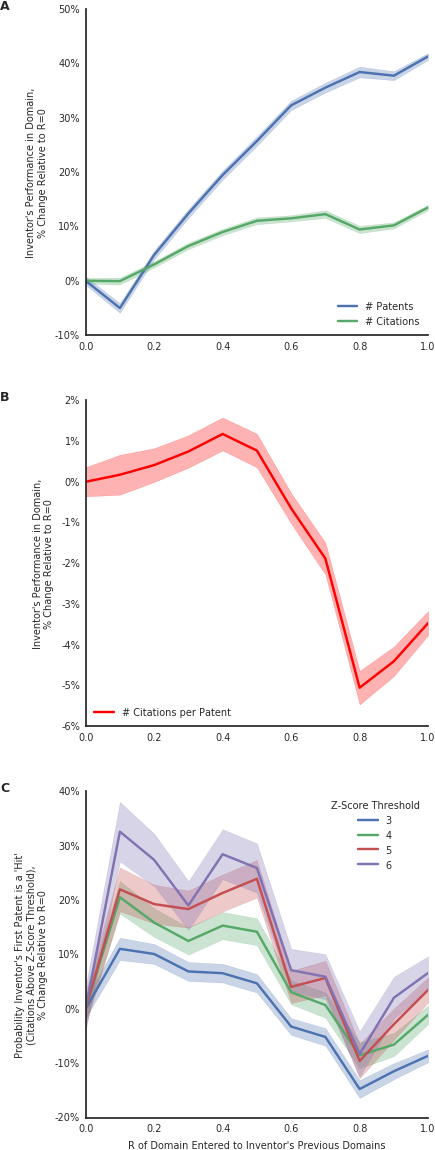

In [13]:
fig = figure(figsize=(fig_one_col,fig_one_col*2*golden))
thresholds = [3,4,5,6]
n_rows = 3
n_cols = 1
this_ax = 0

annotate_coord = (-.25, 1)
panel_label = "A"

this_ax +=1
ax = fig.add_subplot(n_rows, n_cols, this_ax)
performance = 'Agent_Number_of_Patents_in_Class'
m = performance_given_R_dict[performance]['m']
s = performance_given_R_dict[performance]['s']
l = ax.plot(m.index, m.values/m.values[0], label="# Patents")
error_shading(m.index, m.values/m.values[0], s.values/m.values[0], l)

performance = 'Agent_Number_of_Citations_in_Class'
m = performance_given_R_dict[performance]['m']
s = performance_given_R_dict[performance]['s']
l = ax.plot(m.index, m.values/m.values[0], label="# Citations")
error_shading(m.index, m.values/m.values[0], s.values/m.values[0], l)

legend(loc='lower right')
ylabel("Inventor's Performance in Domain,\n% Change Relative to R=0")
ax.yaxis.set_major_formatter(percentdiff_formatter)
add_panel_label(ax)

this_ax +=1
ax = fig.add_subplot(n_rows, n_cols, this_ax)
performance = 'Agent_Number_of_Citations_per_Patent_in_Class'
m = performance_given_R_dict[performance]['m']
s = performance_given_R_dict[performance]['s']
l = ax.plot(m.index, m.values/m.values[0], label="# Citations per Patent", color='red')
error_shading(m.index, m.values/m.values[0], s.values/m.values[0], l)
ax.yaxis.set_major_formatter(percentdiff_formatter)
legend(loc='lower left')
ylabel("Inventor's Performance in Domain,\n% Change Relative to R=0")
add_panel_label(ax)


this_ax +=1
ax = fig.add_subplot(n_rows, n_cols, this_ax)
hit_line_colors = {}
for hit_threshold in thresholds:
    performance = 'Citations_Hit_%i'%hit_threshold
    m = performance_given_R_dict[performance]['m']
    s = performance_given_R_dict[performance]['s']  
    l = plot(m.index, m.values/m.values[0], label='%i'%hit_threshold)# (%.0f%%)'%(hit_threshold, patent_count_increase))
    hit_line_colors[hit_threshold]  = l[-1].get_color()
    error_shading(m.index, m.values/m.values[0], s.values/m.values[0], l)
ylabel("Probability Inventor's First Patent is a 'Hit'\n(Citations Above Z-Score Threshold),"
       "\n% Change Relative to R=0")# for Year and Domain)")
ax.yaxis.set_major_formatter(percentdiff_formatter)
ax.legend(loc='best', title='Z-Score Threshold')#\n(Increase in # Patents)', )
xlabel("R of Domain Entered to Inventor's Previous Domains")

add_panel_label(ax)

fig.subplots_adjust(wspace=.4)
sns.despine()

if save_as_manuscript_figures:
        savefig(figures_directory+'performance_empirical_outcome_ratios_relative_to_0.pdf',
               bbox_inches='tight')

In [6]:
performance_model_store = pd.HDFStore(data_directory+'Performance_Models/performance_models.h5',
                                     mode='r')

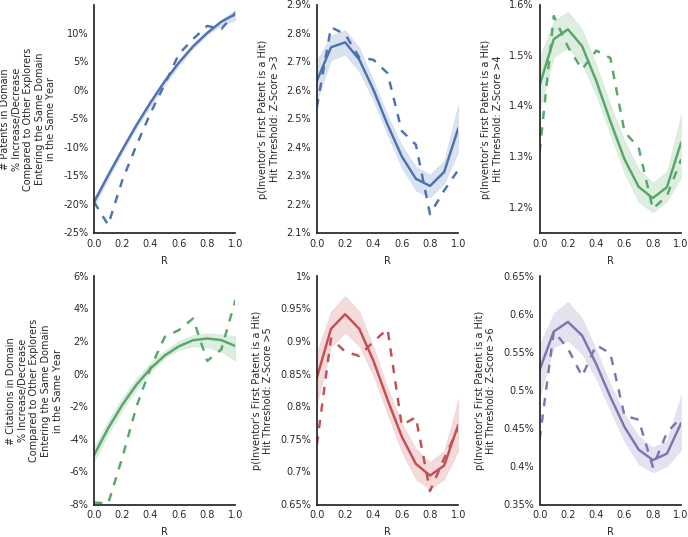

In [15]:
fig = figure(figsize=(fig_two_col,fig_one_col*golden))
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(2, 3)
annotate_coord = (-.25, 1)
panel_label = "A"


hdf_label = 'counts'
prediction_quantiles_given_R = performance_model_store['%s/prediction_quantiles_given_R'%hdf_label] 

ax = plt.subplot(gs[0, 0])
outcome = 'Agent_Number_of_Patents_in_Class'
m = performance_given_R_dict[outcome]['m']
l = ax.plot(m.index, m.values, linestyle='--', color='b')
c = l[-1].get_color()

ax.fill_between(prediction_quantiles_given_R.minor_axis, 
                        prediction_quantiles_given_R[outcome,.025],
                        prediction_quantiles_given_R[outcome,.975],
                        alpha=.2,
               color=c)
ax.plot(prediction_quantiles_given_R.minor_axis,
        prediction_quantiles_given_R[outcome,.5],
       color=c)
ax.yaxis.set_major_formatter(percentdiff_formatter)
ax.set_ylabel("# Patents in Domain\n% Increase/Decrease\nCompared to Other Explorers\nEntering the Same Domain\nin the Same Year")
ax.set_xlabel("R")


ax = plt.subplot(gs[1, 0])
outcome = 'Agent_Number_of_Citations_in_Class'
m = performance_given_R_dict[outcome]['m']
l = ax.plot(m.index, m.values, linestyle='--', color='g')
c = l[-1].get_color()

ax.fill_between(prediction_quantiles_given_R.minor_axis, 
                        prediction_quantiles_given_R[outcome,.025],
                        prediction_quantiles_given_R[outcome,.975],
                        alpha=.2,
               color=c)
ax.plot(prediction_quantiles_given_R.minor_axis,
        prediction_quantiles_given_R[outcome,.5],
       color=c)
ax.yaxis.set_major_formatter(percentdiff_formatter)
ax.set_ylabel("# Citations in Domain\n% Increase/Decrease\nCompared to Other Explorers\nEntering the Same Domain\nin the Same Year")
ax.set_xlabel("R")

######
hdf_label = 'hits'
prediction_quantiles_given_R = performance_model_store['%s/prediction_quantiles_given_R'%hdf_label] 

for hit_threshold, coor in zip(thresholds, [(0,1), (0,2), (1,1), (1,2)]):
    ax = plt.subplot(gs[coor[0], coor[1]])
    performance = 'Citations_Hit_%i'%hit_threshold
    m = performance_given_R_dict[performance]['m']
    c = hit_line_colors[hit_threshold]
    l = plot(m.index, m.values, linestyle='--', color=c)

    ax.fill_between(prediction_quantiles_given_R.minor_axis, 
                        prediction_quantiles_given_R[hit_threshold,.025],
                        prediction_quantiles_given_R[hit_threshold,.975],
                        alpha=.2,
               color=c)
    ax.plot(prediction_quantiles_given_R.minor_axis,
            prediction_quantiles_given_R[hit_threshold,.5],
           color=c)

    ylabel("p(Inventor's First Patent is a Hit)\nHit Threshold: Z-Score >%i"%hit_threshold)
    xlabel("R")
    ax.yaxis.set_major_formatter(percent_formatter)

sns.despine()
fig.tight_layout()
if save_as_manuscript_figures:
        savefig(figures_directory+'performance_with_models.pdf',
               bbox_inches='tight')

In [ ]:
with sns.axes_style("white"):
    fig = figure(figsize=(fig_one_col,fig_one_col/golden))
    import matplotlib.gridspec as gridspec
    gs = gridspec.GridSpec(1, 1)
    ax = plt.subplot(gs[0, 0])


    hdf_label = 'counts'
    prediction_quantiles_given_R = performance_model_store['%s/prediction_quantiles_given_R'%hdf_label] 

    outcome = 'Agent_Number_of_Patents_in_Class'
    m = performance_given_R_dict[outcome]['m']
    l = ax.plot(m.index, m.values/m.values[0], linestyle='--', color='b')
    c = l[-1].get_color()



    outcome = 'Agent_Number_of_Citations_in_Class'
    m = performance_given_R_dict[outcome]['m']
    l = ax.plot(m.index, m.values/m.values[0], linestyle='--', color='g')
    c = l[-1].get_color()

    ax.fill_between(prediction_quantiles_given_R.minor_axis, 
                            prediction_quantiles_given_R[outcome,.025]/m.values[0],
                            prediction_quantiles_given_R[outcome,.975]/m.values[0],
                            alpha=.2,
                   color=c)
    ax.plot(prediction_quantiles_given_R.minor_axis,
            prediction_quantiles_given_R[outcome,.5]/m.values[0], label='# Citations',
           color=c)
    ax.set_xlabel("R")

    ax.legend(loc='upper left')
    ax.set_ylabel("Inventor's Performance in Domain,\n% Change Relative to R=0")
    ax.yaxis.set_major_formatter(percentdiff_formatter)

    sns.despine()
    fig.tight_layout()
    if save_as_manuscript_figures:
            savefig(figures_directory+'patents_and_citations_with_models.pdf',
                   bbox_inches='tight')

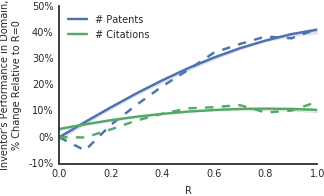

In [43]:
with sns.axes_style("white"):
    fig = figure(figsize=(fig_one_col,fig_one_col/golden))
    import matplotlib.gridspec as gridspec
    gs = gridspec.GridSpec(1, 1)
    ax = plt.subplot(gs[0, 0])


    hdf_label = 'counts'
    prediction_quantiles_given_R = performance_model_store['%s/prediction_quantiles_given_R'%hdf_label] 

    outcome = 'Agent_Number_of_Patents_in_Class'
    m = performance_given_R_dict[outcome]['m']
    l = ax.plot(m.index, m.values/m.values[0], linestyle='--', color='b')
    c = l[-1].get_color()

    ax.fill_between(prediction_quantiles_given_R.minor_axis, 
                            prediction_quantiles_given_R[outcome,.025]/m.values[0],
                            prediction_quantiles_given_R[outcome,.975]/m.values[0],
                            alpha=.2,
                   color=c)
    ax.plot(prediction_quantiles_given_R.minor_axis,
            prediction_quantiles_given_R[outcome,.5]/m.values[0], label='# Patents',
           color=c)


    outcome = 'Agent_Number_of_Citations_in_Class'
    m = performance_given_R_dict[outcome]['m']
    l = ax.plot(m.index, m.values/m.values[0], linestyle='--', color='g')
    c = l[-1].get_color()

    ax.fill_between(prediction_quantiles_given_R.minor_axis, 
                            prediction_quantiles_given_R[outcome,.025]/m.values[0],
                            prediction_quantiles_given_R[outcome,.975]/m.values[0],
                            alpha=.2,
                   color=c)
    ax.plot(prediction_quantiles_given_R.minor_axis,
            prediction_quantiles_given_R[outcome,.5]/m.values[0], label='# Citations',
           color=c)
    ax.set_xlabel("R")

    ax.legend(loc='upper left')
    ax.set_ylabel("Inventor's Performance in Domain,\n% Change Relative to R=0")
    ax.yaxis.set_major_formatter(percentdiff_formatter)

    sns.despine()
    fig.tight_layout()
    if save_as_manuscript_figures:
            savefig(figures_directory+'patents_and_citations_with_models.pdf',
                   bbox_inches='tight')

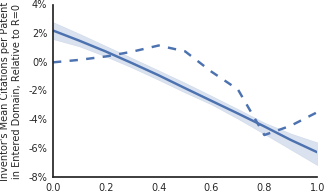

In [44]:
with sns.axes_style("white"):
    fig = figure(figsize=(fig_one_col,fig_one_col/golden))
    import matplotlib.gridspec as gridspec
    gs = gridspec.GridSpec(1, 1)
    ax = plt.subplot(gs[0, 0])


   
    outcome = 'Agent_Number_of_Citations_per_Patent_in_Class'
    m = performance_given_R_dict[outcome]['m']
    l = ax.plot(m.index, m.values/m.values[0], label="# Citations per Patent", linestyle='--')
    c = l[-1].get_color()
    
    hdf_label = 'counts'
    prediction_quantiles_given_R = performance_model_store['%s/prediction_quantiles_given_R'%hdf_label] 

    ax.fill_between(prediction_quantiles_given_R.minor_axis, 
                            prediction_quantiles_given_R[outcome,.025]/m.values[0],
                            prediction_quantiles_given_R[outcome,.975]/m.values[0],
                            alpha=.2,
                   color=c)
    ax.plot(prediction_quantiles_given_R.minor_axis,
            prediction_quantiles_given_R[outcome,.5]/m.values[0], label='# Citations per Patent',
           color=c)
    
    
#     ax.legend(loc='lower left')
    ax.set_ylabel("Inventor's Mean Citations per Patent\nin Entered Domain, Relative to R=0")
    ax.yaxis.set_major_formatter(percentdiff_formatter)

    sns.despine()
    fig.tight_layout()
    if save_as_manuscript_figures:
            savefig(figures_directory+'citations_per_patent_with_model.pdf',
                   bbox_inches='tight')

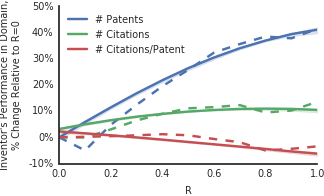

In [14]:
with sns.axes_style("white"):
    fig = figure(figsize=(fig_one_col,fig_one_col/golden))
    import matplotlib.gridspec as gridspec
    gs = gridspec.GridSpec(1, 1)
    ax = plt.subplot(gs[0, 0])


    hdf_label = 'counts'
    prediction_quantiles_given_R = performance_model_store['%s/prediction_quantiles_given_R'%hdf_label] 

    outcome = 'Agent_Number_of_Patents_in_Class'
    m = performance_given_R_dict[outcome]['m']
    l = ax.plot(m.index, m.values/m.values[0], linestyle='--', color='b')
    c = l[-1].get_color()

    ax.fill_between(prediction_quantiles_given_R.minor_axis, 
                            prediction_quantiles_given_R[outcome,.025]/m.values[0],
                            prediction_quantiles_given_R[outcome,.975]/m.values[0],
                            alpha=.2,
                   color=c)
    ax.plot(prediction_quantiles_given_R.minor_axis,
            prediction_quantiles_given_R[outcome,.5]/m.values[0], label='# Patents',
           color=c)


    outcome = 'Agent_Number_of_Citations_in_Class'
    m = performance_given_R_dict[outcome]['m']
    l = ax.plot(m.index, m.values/m.values[0], linestyle='--', color='g')
    c = l[-1].get_color()

    ax.fill_between(prediction_quantiles_given_R.minor_axis, 
                            prediction_quantiles_given_R[outcome,.025]/m.values[0],
                            prediction_quantiles_given_R[outcome,.975]/m.values[0],
                            alpha=.2,
                   color=c)
    ax.plot(prediction_quantiles_given_R.minor_axis,
            prediction_quantiles_given_R[outcome,.5]/m.values[0], label='# Citations',
           color=c)
    ax.set_xlabel("R")
    
    outcome = 'Agent_Number_of_Citations_per_Patent_in_Class'
    m = performance_given_R_dict[outcome]['m']
    l = ax.plot(m.index, m.values/m.values[0], linestyle='--', color='r')
    c = l[-1].get_color()

    ax.fill_between(prediction_quantiles_given_R.minor_axis, 
                            prediction_quantiles_given_R[outcome,.025]/m.values[0],
                            prediction_quantiles_given_R[outcome,.975]/m.values[0],
                            alpha=.2,
                   color=c)
    ax.plot(prediction_quantiles_given_R.minor_axis,
            prediction_quantiles_given_R[outcome,.5]/m.values[0], label='# Citations/Patent',
           color=c)
    ax.set_xlabel("R")

    ax.legend(loc='upper left')
    ax.set_ylabel("Inventor's Performance in Domain,\n% Change Relative to R=0")
    ax.yaxis.set_major_formatter(percentdiff_formatter)

    sns.despine()
    fig.tight_layout()
    if save_as_manuscript_figures:
            savefig(figures_directory+'patents_citations_and_citations_per_patent_with_models.pdf',
                   bbox_inches='tight')

In [14]:
def model_parameters(all_samples, formula_variables, formula_variables_labels,
                     legend_title, legend_labels=None):
    fig = figure(figsize=(fig_two_col, fig_two_col*golden))

    outcomes = all_samples.items
    
    n_rows = len(formula_variables)
    n_cols = 1
    this_ax = 0

    from scipy.stats import scoreatpercentile
    from bisect import bisect_left

    var_i = 0
    for col in formula_variables:
        this_ax +=1
        ax = fig.add_subplot(n_rows, n_cols, this_ax)
        for outcome in outcomes:
            if legend_labels is None:
                label = '{0}'.format(outcome).replace('_',' ')
            else:
                label = legend_labels[outcome]
            p = sns.kdeplot(all_samples[outcome][col], ax=ax, label=label, legend=False, linewidth=1)
            p = p.get_lines()[-1]
            x,y = p.get_data()
            c = p.get_color()
            lower = scoreatpercentile(all_samples[outcome][col], 2.5)
            upper = scoreatpercentile(all_samples[outcome][col], 97.5)
            lower_ind = bisect_left(x,lower)
            upper_ind = bisect_left(x,upper) 
            ax.fill_between(x[lower_ind:upper_ind], y[lower_ind:upper_ind], alpha=.4, color=c)
        col_label = formula_variable_labels[col]
        var_i+=1
        ax.set_xlabel(col_label, labelpad=1, fontsize=10)
        ax.set_yticks([])
        ax.set_xlim(-.33,.7)
#         ax.set_xticks(arange(-.3,.8,.1))
        if ax.get_xlim()[0]<=0 and ax.get_xlim()[1]>=0:
            ax.axvline(0, color='black', linestyle='--', linewidth=.5)
        if this_ax==1:
            legend(loc='upper right',ncol=4, title=legend_title)
    fig.tight_layout()
    
    sns.despine(left=True)
#     fig.tight_layout()
    return fig

/home/jeffrey_alstott/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


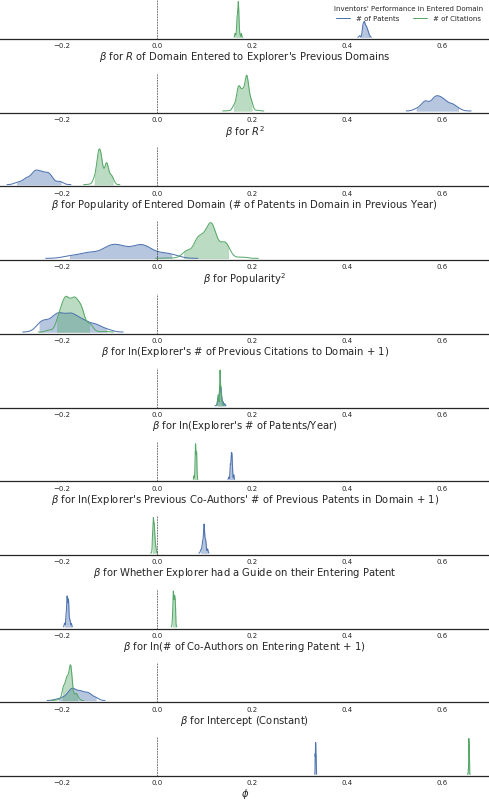

In [15]:
hdf_label = 'counts'
samples = performance_model_store['%s/model_samples_thinned'%hdf_label]
formula_variables = performance_model_store['%s/formula_variables'%hdf_label]#.values.tolist()

formula_variable_labels = {'Intercept': r"$\beta$ for Intercept (Constant)",
                           'Relatedness':r"$\beta$ for $R$ of Domain Entered to Explorer's Previous Domains",
                          'np.power(Relatedness, 2)':r'$\beta$ for $R^2$',
                          'Popularity':r'$\beta$ for Popularity of Entered Domain (# of Patents in Domain in Previous Year)',                                               
                          'np.power(Popularity, 2)':r'$\beta$ for Popularity$^2$',
                          'log(Agent_Previous_Citations_to_Class+1)':r"$\beta$ for ln(Explorer's # of Previous Citations to Domain + 1)",
                          'log(CoAgent_Previous_Patent_Count_in_Class+1)':r"$\beta$ for ln(Explorer's Previous Co-Authors' # of Previous Patents in Domain + 1)",
                          'log(Agent_Productivity_Patents)':r"$\beta$ for ln(Explorer's # of Patents/Year)",
                           'phi': '$\phi$',
                           'Guided': r"$\beta$ for Whether Explorer had a Guide on their Entering Patent",
                           'log(N_Agents)': r"$\beta$ for ln(# of Co-Authors on Entering Patent + 1)"
                          }

formula_variables = formula_variables.values.tolist()

samples = samples.sort_index(ascending=False)

fig = model_parameters(samples, formula_variables+['Intercept']+['phi'], formula_variable_labels,
                       "Inventors' Performance in Entered Domain",
                       legend_labels={'Agent_Number_of_Patents_in_Class': '# of Patents',
                                      'Agent_Number_of_Citations_in_Class': '# of Citations',
                                     }
                      )
if save_as_manuscript_figures:
        savefig(figures_directory+'counts_model_parameters.pdf',
               bbox_inches='tight')    

In [41]:
# hdf_label = 'hits'
# all_samples = performance_model_store['%s/model_samples_thinned'%hdf_label]
# formula_variables = performance_model_store['%s/formula_variables'%hdf_label]#.values.tolist()

# formula_variable_labels = {'Intercept': r"$\beta$ for Intercept (Constant)",
#                            'Relatedness':r"$\beta$ for $R$ of Domain Entered to Inventor's Previous Domains",
#                           'np.power(Relatedness, 2)':r'$\beta$ for $R^2$',
#                           'np.power(Relatedness, 3)':r'$\beta$ for $R^3$',                           
#                           'Popularity':r'$\beta$ for Popularity of Entered Domain (# of Patents in Domain in Previous Year)',                                               
#                           'np.power(Popularity, 2)':r'$\beta$ for Popularity$^2$',
#                           'log(Agent_Previous_Citations_to_Class+1)':r"$\beta$ for ln(Inventor's # of Previous Citations to Domain + 1)",
#                           'log(CoAgent_Previous_Patent_Count_in_Class+1)':r"$\beta$ for ln(Inventor's Co-Author's # of Previous Patents in Domain + 1)",
#                           'log(Agent_Productivity_Patents)':r"$\beta$ for ln(Inventor's # of Patents/Year)",
#                            'phi': '$\phi$'
#                           }
# formula_variables = formula_variables.values.tolist()

# all_samples = all_samples.sort_index(ascending=True)

# fig = model_parameters(all_samples, formula_variables+['Intercept'], formula_variable_labels,
#                        "Hit Z-Score Threshold",
#                       )
# if save_as_manuscript_figures:
#         savefig(figures_directory+'hits_model_parameters.pdf',
#                bbox_inches='tight')    

Case Studies
====

In [146]:
store = pd.HDFStore(data_directory+'organized_patent_data.h5')
class_data = store['classes_lookup_IPC4']
class_data.set_index('Class_Name', inplace=True)

class_names = pd.read_csv(data_directory+'IPC4_descriptions.csv')
class_names.set_index('Class', inplace=True)
class_data['Description'] = class_names.ix[class_data.index.values, 'Short Description'].values

class_data = class_data.reset_index().set_index('Class_ID')
class_data.rename(columns={'Class_Name': 'IPC4'}, inplace=True)

agents_lookup = store['agents_lookup_explorers_IPC4']

agent_names = pd.read_csv(data_directory+'inv_id_names.csv')

agent_names = agent_names[~agent_names['INV_ID'].duplicated()]

agent_names.set_index('INV_ID', inplace=True)
agents_lookup['Surname'] = agent_names.ix[agents_lookup['Disambiguation_ID'].values, 'LASTNAME'].values
agents_lookup['Given Name'] = agent_names.ix[agents_lookup['Disambiguation_ID'].values, 'FIRSTNAME'].values

In [147]:
entries['Class_IPC4'] = class_data.ix[entries['Class_ID'], 'IPC4'].values

entries['Agent_Home_Class_IPC4'] = class_data.ix[entries['Agent_Home_Class'], 'IPC4'].values

In [148]:
reference_group = 'for_Year_and_Class_of_New_Immigrants_to_Class'
entries['Patent_Count_Outcome_Ratio'] = outcome_ratio_in_group(entries, 'Agent_Number_of_Patents_in_Class', reference_group)

entries['Citations_Outcome_Ratio'] = outcome_ratio_in_group(entries, 'First_Patent_Citations', 'for_Year_and_Class')

In [192]:
# performance_variable = 'Agent_Number_of_Patents_in_Class'
# baseline_variable = '_Mean_for_Year_and_Class_of_New_Immigrants_to_Class'
# baseline = performance_variable + baseline_variable

# candidate_indices = {}

# candidate_indices['move_related_high_patents_no_hit'] = ( (entries['Agent_Number_of_Classes_All_Time']>1)
#                                                          * (entries['Agent_Class_Number']==2)
#                                                          * (entries[relatedness]>=.9)
#                                                          * (entries[performance_variable]/entries[baseline] > 2)
#                                                          * (entries['Application_Year']>1990)
#                                                          * (~entries['Citations_Hit_3'].astype('bool'))
#                                                          * (entries['CoAgent_Previous_Patent_Count_in_Class']==0)
#                                                          * (entries['Agent_Previous_Citations_to_Class']==0)
#                                                         )
# print(candidate_indices['move_related_high_patents_no_hit'].sum())

# candidate_indices['move_unrelated_no_hit'] = ( (entries['Agent_Number_of_Classes_All_Time']>1)
#                                            * (entries['Agent_Class_Number']==2)
#                                            * (entries[relatedness]<=.5) * (entries[relatedness]>=.1)
#                                            * (entries[performance_variable]/entries[baseline] < .5)
#                                            * (entries['Application_Year']>1990)
#                                            * (~entries['Citations_Hit_3'].astype('bool'))
#                                            * (entries['CoAgent_Previous_Patent_Count_in_Class']==0)
#                                            * (entries['Agent_Previous_Citations_to_Class']==0)
#                                           )
# print(candidate_indices['move_unrelated_no_hit'].sum())

# candidate_indices['move_unrelated_hit'] = ( (entries['Agent_Number_of_Classes_All_Time']>1)
#                                            * (entries['Agent_Class_Number']==2)
#                                            * (entries[relatedness]<=.5) * (entries[relatedness]>=.1)
# #                                            * (entries[performance_variable]/entries[baseline] < 1)
#                                            * (entries['Application_Year']>1990)
#                                            * (entries['Citations_Hit_5'].astype('bool'))
#                                            * (entries['CoAgent_Previous_Patent_Count_in_Class']==0)
#                                            * (entries['Agent_Previous_Citations_to_Class']==0)
#                                           )
# print(candidate_indices['move_unrelated_hit'].sum())

22735
62311
715


/home/jeffrey_alstott/anaconda3/lib/python3.4/site-packages/pandas/computation/expressions.py:190: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  unsupported[op_str]))


In [152]:
performance_variable = 'Agent_Number_of_Patents_in_Class'
baseline_variable = '_Mean_for_Year_and_Class_of_New_Immigrants_to_Class'
baseline = performance_variable + baseline_variable

candidate_indices = {}

candidate_indices['move_highly_related_high_patents'] = ( (entries['Agent_Number_of_Classes_All_Time']>1)
                                                         * (entries['Agent_Class_Number']==2)
                                                         * (entries[relatedness]>=.9)
#                                                          * (entries[performance_variable]/entries[baseline] > 1)
                                                         * (entries[performance_variable]>5) * (entries[performance_variable]<=10)
                                           * (entries['Application_Year']>1990)*(entries['Application_Year']<2000)
#                                                          * (~entries['Citations_Hit_3'].astype('bool'))
                                                         * (entries['CoAgent_Previous_Patent_Count_in_Class']==0)
                                                         * (entries['Agent_Previous_Citations_to_Class']==0)
                                                        )
print(candidate_indices['move_highly_related_high_patents'].sum())

candidate_indices['move_medium_related_medium_patents'] = ( (entries['Agent_Number_of_Classes_All_Time']>1)
                                           * (entries['Agent_Class_Number']==2)
                                           * (entries[relatedness]<=.5) * (entries[relatedness]>=.1)
#                                            * (entries[performance_variable]/entries[baseline] < .5)
                                           * (entries[performance_variable]<=5) * (entries[performance_variable]>1)
#                                            * (entries[performance_variable]>1)
                                           * (entries['Application_Year']>1990)*(entries['Application_Year']<2000)
#                                            * (~entries['Citations_Hit_3'].astype('bool'))
                                           * (entries['CoAgent_Previous_Patent_Count_in_Class']==0)
                                           * (entries['Agent_Previous_Citations_to_Class']==0)
                                          )
print(candidate_indices['move_medium_related_medium_patents'].sum())

candidate_indices['move_unrelated'] = ( (entries['Agent_Number_of_Classes_All_Time']>1)
                                           * (entries['Agent_Class_Number']==2)
                                           * (entries[relatedness]<=.2)# * (entries[relatedness]>=.1)
#                                            * (entries[relatedness]==0)
                                           * (entries[performance_variable]==0)
                                           * (entries['Application_Year']>1990)*(entries['Application_Year']<2000)
#                                            * (entries['Citations_Hit_5'].astype('bool'))
                                           * (entries['CoAgent_Previous_Patent_Count_in_Class']==0)
                                           * (entries['Agent_Previous_Citations_to_Class']==0)
                                          )
print(candidate_indices['move_unrelated'].sum())

/home/jeffrey_alstott/anaconda3/lib/python3.5/site-packages/pandas/computation/expressions.py:181: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  unsupported[op_str]))


3122
6202
36489


In [153]:
# matched_case_studies = entries.ix[candidate_indices['move_related_high_patents_no_hit']].merge(entries.ix[candidate_indices['move_unrelated_hit']],
#                                                                                  on=['Class_ID', 'Application_Year'],
#                                                                                  suffixes=('', '_unrelated_hit'))

# matched_case_studies = matched_case_studies.merge(entries.ix[candidate_indices['move_unrelated_no_hit']],
#                                                                                  on=['Class_ID', 'Application_Year'],
#                                                                                  suffixes=('', '_unrelated_no_hit'))

matched_case_studies = entries.ix[candidate_indices['move_highly_related_high_patents']].merge(entries.ix[candidate_indices['move_medium_related_medium_patents']],
                                                                                 on=['Class_ID', 'Application_Year'],
                                                                                 suffixes=('', '_medium_related_medium_patents'))

matched_case_studies = matched_case_studies.merge(entries.ix[candidate_indices['move_unrelated']],
                                                                                 on=['Class_ID', 'Application_Year'],
                                                                                 suffixes=('', '_unrelated'))

In [154]:
candidate_classes = matched_case_studies['Class_ID'].value_counts()

candidate_classes.name = 'Number_of_Matches'

pd.DataFrame(candidate_classes).join(class_data)

,Number_of_Matches,IPC4,Description
539,1254374,G06F,Digital Data Processing
586,324535,H01L,Semiconductor devices
66,127093,A61K,Medical Preparations
59,63420,A61B,Medical Diagnostics
510,41776,G01N,Analyzing Materials
162,39892,B32B,Layered Products
542,39326,G06K,Data Recording
616,33169,H04L,Digital Telecommunication
618,32386,H04N,Visual Communication
612,23750,H04B,Transmission


In [155]:
# for label in ['', '_unrelated_hit', '_unrelated_no_hit']:
#     matched_case_studies['Agent_Home_Class_Name'+label] = class_data.ix[matched_case_studies['Agent_Home_Class'+label], 'Description'].values
    
#     matched_case_studies['Name'+label] = (agents_lookup.ix[matched_case_studies['Agent_ID'+label], 'Given Name'] + ' ' +
#                                           agents_lookup.ix[matched_case_studies['Agent_ID'+label], 'Surname']
#                                          ).values
for label in ['', '_medium_related_medium_patents', '_unrelated']:
    matched_case_studies['Agent_Home_Class_Name'+label] = class_data.ix[matched_case_studies['Agent_Home_Class'+label], 'Description'].values
    
    matched_case_studies['Name'+label] = (agents_lookup.ix[matched_case_studies['Agent_ID'+label], 'Given Name'] + ' ' +
                                          agents_lookup.ix[matched_case_studies['Agent_ID'+label], 'Surname']
                                         ).values

In [156]:
# classes_of_interest = ['C07D']#, 'A61K','C07C', 'C08G', 'B01J', 'A61B']

# for class_of_interest in classes_of_interest:
#     ind = ((matched_case_studies['Class_IPC4']==class_of_interest) *
#            (matched_case_studies['Agent_Number_of_Patents_in_Class']/matched_case_studies['Agent_Number_of_Patents_in_Class_unrelated_no_hit'] > 5) *
#            (matched_case_studies['Agent_Number_of_Patents_in_Class']>10) *
#            (matched_case_studies['Agent_Number_of_Patents_in_Class_unrelated_no_hit']<5) *
#            (matched_case_studies['Agent_Number_of_Patents_in_Class_unrelated_hit']<10) *
#            (matched_case_studies['Citations_unrelated_hit']>20) *
#            (matched_case_studies['Citations_unrelated_no_hit']<10) *
#            (matched_case_studies['Citations']<10) *
#             (matched_case_studies['Citations_unrelated_hit']/matched_case_studies['Citations_unrelated_no_hit'] > 5) * 
#            (matched_case_studies['Agent_Home_Class_unrelated_hit']!=matched_case_studies['Agent_Home_Class_unrelated_no_hit'])
#           )
#     print(sum(ind))
#     info = ['Agent_Home_Class_Name',
#            'Name',
#             'Agent_ID',
#            'Agent_Number_of_Patents_in_Class',
#             'Citations',
#             'Agent_Home_Class_IPC4',
#             'Relatedness',
#             'Patent_Count_Outcome_Ratio',
#             'Citations_Outcome_Ratio',
#            ]
#     all_info = []
#     for i in info:
#         for label in ['', '_unrelated_hit', '_unrelated_no_hit']:
#             all_info.append(i+label)
#     class_description = class_data.set_index('IPC4').ix[class_of_interest, 'Description']
#     print(class_of_interest, class_description)
#     matched_case_studies.ix[ind, all_info].to_csv(data_directory+'Examples_and_Visualizations/case_studies_%s_%s.csv'%(class_description, class_of_interest))

classes_of_interest = ['C07D']#, 'A61K','C07C', 'C08G', 'B01J', 'A61B']

for class_of_interest in classes_of_interest:
    ind = ((matched_case_studies['Class_IPC4']==class_of_interest) *
#            (matched_case_studies['Agent_Number_of_Patents_in_Class']/matched_case_studies['Agent_Number_of_Patents_in_Class_unrelated_no_hit'] > 5) *
#            (matched_case_studies['Agent_Number_of_Patents_in_Class']>10) *
#            (matched_case_studies['Agent_Number_of_Patents_in_Class_unrelated_no_hit']<5) *
#            (matched_case_studies['Agent_Number_of_Patents_in_Class_unrelated_hit']<10) *
#            (matched_case_studies['Citations_unrelated_hit']>20) *
#            (matched_case_studies['Citations_unrelated_no_hit']<10) *
#            (matched_case_studies['Citations']<10) *
#             (matched_case_studies['Citations_unrelated_hit']/matched_case_studies['Citations_unrelated_no_hit'] > 5) * 
           (matched_case_studies['Agent_Home_Class_medium_related_medium_patents']!=matched_case_studies['Agent_Home_Class_unrelated'])
          )
    print(sum(ind))
    info = ['Agent_Home_Class_Name',
           'Name',
            'Agent_ID',
           'Agent_Number_of_Patents_in_Class',
#             'Citations',
            'Agent_Home_Class_IPC4',
            'Relatedness',
            'Application_Year'
#             'Patent_Count_Outcome_Ratio',
#             'Citations_Outcome_Ratio',
           ]
    all_info = []
    for i in info:
        for label in ['', '_medium_related_medium_patents', '_unrelated']:
            all_info.append(i+label)
    class_description = class_data.set_index('IPC4').ix[class_of_interest, 'Description']
    print(class_of_interest, class_description)
    matched_case_studies.ix[ind, all_info].to_csv(figures_directory+'case_studies_%s_%s.csv'%(class_description, class_of_interest))

/home/jeffrey_alstott/anaconda3/lib/python3.5/site-packages/pandas/computation/expressions.py:181: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  unsupported[op_str]))


11374
C07D Heterocyclic Compounds


Comparison of Alternative Relatedness Measures
===

In [168]:
relatedness_types = ['Class_Cited_by_Class_Count', 'Class_CoOccurrence_Count_Inventor', 'Class_CoOccurrence_Count_PID']
relatedness_type_names = ['Citations', 'Inventor Co-Occurrence', 'Co-Classification']

Prediction
---

Citations
Inventor Co-Occurrence
Co-Classification


/home/jeffrey_alstott/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


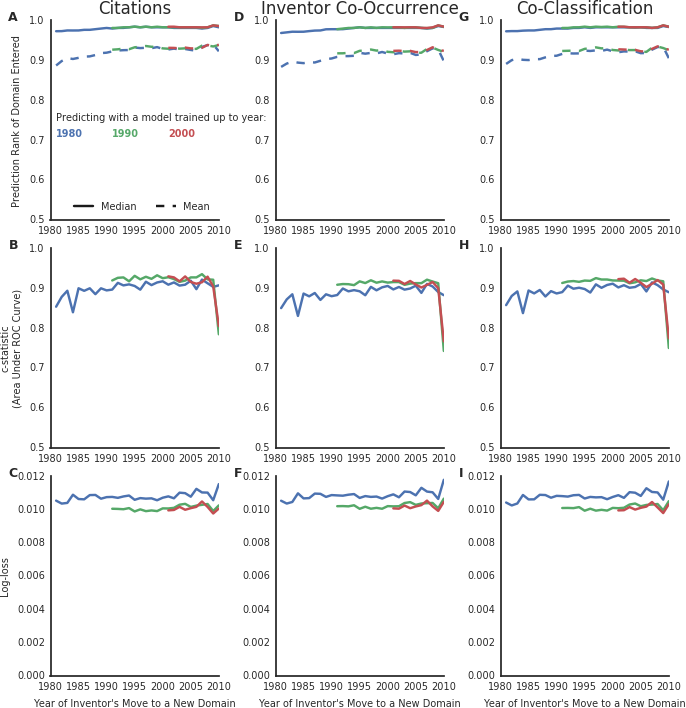

In [170]:
target = 'entries_with_predictions_NB_4D'

store = pd.HDFStore(data_directory+'Agent_Entries/agent_%s_%s.h5'%(target, class_system), mode='r')
entries = store['%s_%s'%(target, class_system)]
store.close()

fig = figure(figsize=(fig_two_col,fig_one_point_five_col*golden))
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(3, 3)
this_ax = 0
annotate_coord = (-.25, 1)
panel_label = "A"

col = 0
for relatedness_type, relatedness_type_name in zip(relatedness_types, relatedness_type_names):
    print(relatedness_type_name)
    relatedness = '%s_1_years_percent_positive_all_years_back_mean'%relatedness_type
    
    ax = plt.subplot(gs[this_ax, col]) 
    this_ax +=1
    for model_year in model_years:
        column_label = '%i_NB_4D_with_%s_and_%s'%(model_year, relatedness, popularity)
        q = entries.groupby('Application_Year')['Prediction_Rank_from_'+column_label].median()[model_year+1:]
        p, = ax.plot(q.index, q.values, linestyle='-')


        q = entries.groupby('Application_Year')['Prediction_Rank_from_'+column_label].mean()[model_year+1:]
        p, = ax.plot(q.index, q.values, linestyle='--', color=p.get_color())
        if col==0:
            text(model_year+1, .71, "%i"%model_year, color=p.get_color(), fontweight='bold')
    ax.set_ylim(.5,1)


    if col==0:
        text(1981, .75, "Predicting with a model trained up to year:")
        plot([],[], linestyle='-', color='k', label='Median')
        plot([],[], linestyle='--', color='k', label='Mean')
        legend(loc='lower right', ncol=2)#, title="Prediction Rank of Domain Entered")
        ax.set_ylabel("Prediction Rank of Domain Entered")
        
    ax.set_title(relatedness_type_name)
    add_panel_label(ax)

    #####
    ax = plt.subplot(gs[this_ax, col]) 
    this_ax +=1

    from sklearn.metrics import auc
    import powerlaw
    f = lambda x: auc(*powerlaw.ccdf(x))
    def f(x):
        try:
            return auc(*powerlaw.ccdf(x))
        except:
            return nan

    for model_year in model_years:
        column_label = '%i_NB_4D_with_%s_and_%s'%(model_year, relatedness, popularity)
        q = entries.groupby('Application_Year')['Prediction_Rank_from_'+column_label].agg(f)[model_year+1:]
        p, = ax.plot(q.index, q.values, linestyle='-')

    ax.set_ylim(.5,1)
    if col==0:
        ax.set_ylabel("c-statistic\n(Area Under ROC Curve)")
    add_panel_label(ax)


    ##########
    ax = plt.subplot(gs[this_ax, col]) 
    this_ax +=1
    for model_year in model_years:
        column_label = '%i_NB_4D_with_%s_and_%s'%(model_year, relatedness, popularity)
        q = entries.groupby('Application_Year')['Prediction_log_loss_from_'+column_label].agg(f)[model_year+1:]
        p, = ax.plot(q.index, q.values, linestyle='-')
    ax.set_ylim(ymin=0)
    if col==0:
        ax.set_ylabel("Log-loss")
    ax.set_xlabel("Year of Inventor's Move to a New Domain")
    add_panel_label(ax)
    
    col += 1
    this_ax = 0

sns.despine()
fig.tight_layout()
if save_as_manuscript_figures:
        savefig(figures_directory+'prediction_alternative_relatedness.pdf',
               bbox_inches='tight')

Performance
---

Citations
Inventor Co-Occurrence
Co-Classification


/home/jeffrey_alstott/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


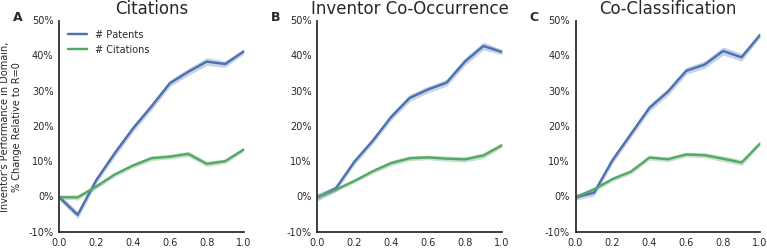

In [175]:
fig = figure(figsize=(fig_two_col,fig_one_col/golden))

import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(1, 3)
this_ax = 0
annotate_coord = (-.25, 1)
panel_label = "A"

col = 0

entries = pd.read_hdf(data_directory+'Performance_Models/entries_for_performance_analysis.h5', 'entries')

for relatedness_type, relatedness_type_name in zip(relatedness_types, relatedness_type_names):
    print(relatedness_type_name)
    relatedness = '%s_1_years_percent_positive_all_years_back_mean'%relatedness_type
    entries['Relatedness'] = entries[relatedness]

    n_bins = 10
    entries['Relatedness_binned'] = entries['Relatedness']
    entries.ix[(entries[relatedness]==0), 'Relatedness_binned'] = -1
    entries['Relatedness_binned'] = digitize(entries['Relatedness_binned'], arange(n_bins)/n_bins)/n_bins

    grouper = entries.groupby('Relatedness_binned')

    performance_given_R_dict = {}
    reference_group = 'for_Year_and_Class_of_New_Immigrants_to_Class'
   
    performance = 'Agent_Number_of_Patents_in_Class'
    m = grouper.apply(lambda x: outcome_ratio_in_group(x, performance, reference_group).replace([inf, -inf], [nan, nan]).dropna().mean())
    s = grouper.apply(lambda x: outcome_ratio_in_group(x, performance, reference_group).replace([inf, -inf], [nan, nan]).dropna().sem())
    performance_given_R_dict[performance] = {}
    performance_given_R_dict[performance]['m'] = m
    performance_given_R_dict[performance]['s'] = s

    performance = 'Agent_Number_of_Citations_in_Class'
    m = grouper.apply(lambda x: outcome_ratio_in_group(x, performance, reference_group).replace([inf, -inf], [nan, nan]).dropna().mean())
    s = grouper.apply(lambda x: outcome_ratio_in_group(x, performance, reference_group).replace([inf, -inf], [nan, nan]).dropna().sem())
    performance_given_R_dict[performance] = {}
    performance_given_R_dict[performance]['m'] = m
    performance_given_R_dict[performance]['s'] = s

    ax = plt.subplot(gs[this_ax, col]) 
    this_ax +=1
    performance = 'Agent_Number_of_Patents_in_Class'
    m = performance_given_R_dict[performance]['m']
    s = performance_given_R_dict[performance]['s']
    l = ax.plot(m.index, m.values/m.values[0], label="# Patents")
    error_shading(m.index, m.values/m.values[0], s.values/m.values[0], l)

    performance = 'Agent_Number_of_Citations_in_Class'
    m = performance_given_R_dict[performance]['m']
    s = performance_given_R_dict[performance]['s']
    l = ax.plot(m.index, m.values/m.values[0], label="# Citations")
    error_shading(m.index, m.values/m.values[0], s.values/m.values[0], l)
   
    if col==0:
        ylabel("Inventor's Performance in Domain,\n% Change Relative to R=0")
        legend(loc='best')
    ax.yaxis.set_major_formatter(percentdiff_formatter)
    add_panel_label(ax)
    ax.set_title(relatedness_type_name)
    
    col += 1
    this_ax = 0

fig.subplots_adjust(wspace=.4)
sns.despine()

if save_as_manuscript_figures:
        savefig(figures_directory+'performance_alternative_relatedness.pdf',
               bbox_inches='tight')

Citations
Inventor Co-Occurrence
Co-Classification


/home/jeffrey_alstott/anaconda3/lib/python3.4/site-packages/matplotlib/font_manager.py:1287: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


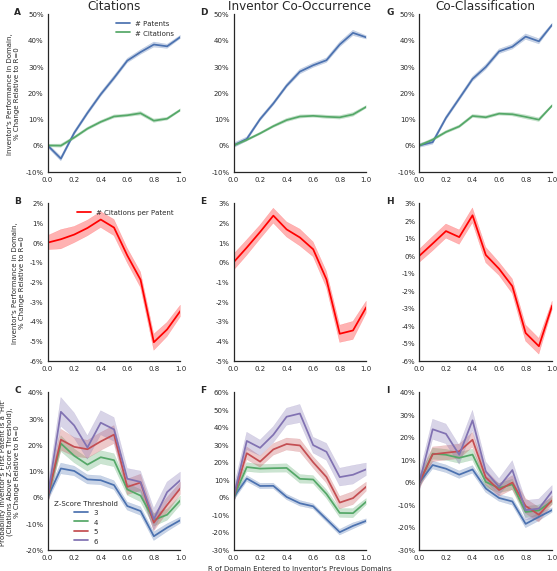

In [31]:
fig = figure(figsize=(fig_two_col,fig_one_col*2*golden))

import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(3, 3)
this_ax = 0
annotate_coord = (-.25, 1)
panel_label = "A"

thresholds = [3,4,5,6]

col = 0

entries = pd.read_hdf(data_directory+'Performance_Models/entries_for_performance_analysis.h5', 'entries')

for relatedness_type, relatedness_type_name in zip(relatedness_types, relatedness_type_names):
    print(relatedness_type_name)
    relatedness = '%s_1_years_percent_positive_all_years_back_mean'%relatedness_type
    entries['Relatedness'] = entries[relatedness]

    n_bins = 10
    entries['Relatedness_binned'] = entries['Relatedness']
    entries.ix[(entries[relatedness]==0), 'Relatedness_binned'] = -1
    entries['Relatedness_binned'] = digitize(entries['Relatedness_binned'], arange(n_bins)/n_bins)/n_bins


    thresholds = [3,4,5,6]


    grouper = entries.groupby('Relatedness_binned')

    performance_given_R_dict = {}
    reference_group = 'for_Year_and_Class_of_New_Immigrants_to_Class'
   
    performance = 'Agent_Number_of_Patents_in_Class'
    m = grouper.apply(lambda x: outcome_ratio_in_group(x, performance, reference_group).replace([inf, -inf], [nan, nan]).dropna().mean())
    s = grouper.apply(lambda x: outcome_ratio_in_group(x, performance, reference_group).replace([inf, -inf], [nan, nan]).dropna().sem())
    performance_given_R_dict[performance] = {}
    performance_given_R_dict[performance]['m'] = m
    performance_given_R_dict[performance]['s'] = s

    performance = 'Agent_Number_of_Citations_in_Class'
    m = grouper.apply(lambda x: outcome_ratio_in_group(x, performance, reference_group).replace([inf, -inf], [nan, nan]).dropna().mean())
    s = grouper.apply(lambda x: outcome_ratio_in_group(x, performance, reference_group).replace([inf, -inf], [nan, nan]).dropna().sem())
    performance_given_R_dict[performance] = {}
    performance_given_R_dict[performance]['m'] = m
    performance_given_R_dict[performance]['s'] = s

    performance = 'Agent_Number_of_Citations_per_Patent_in_Class'
    m = grouper.apply(lambda x: outcome_ratio_in_group(x, performance, reference_group).replace([inf, -inf], [nan, nan]).dropna().mean())
    s = grouper.apply(lambda x: outcome_ratio_in_group(x, performance, reference_group).replace([inf, -inf], [nan, nan]).dropna().sem())
    performance_given_R_dict[performance] = {}
    performance_given_R_dict[performance]['m'] = m
    performance_given_R_dict[performance]['s'] = s

    for hit_threshold in thresholds:
        performance = 'Citations_Hit_%i'%hit_threshold
        m = grouper['Citations_Hit_%i'%hit_threshold].mean()
        s = grouper['Citations_Hit_%i'%hit_threshold].sem()
        performance_given_R_dict[performance] = {}
        performance_given_R_dict[performance]['m'] = m
        performance_given_R_dict[performance]['s'] = s  


    ax = plt.subplot(gs[this_ax, col]) 
    this_ax +=1
    performance = 'Agent_Number_of_Patents_in_Class'
    m = performance_given_R_dict[performance]['m']
    s = performance_given_R_dict[performance]['s']
    l = ax.plot(m.index, m.values/m.values[0], label="# Patents")
    error_shading(m.index, m.values/m.values[0], s.values/m.values[0], l)

    performance = 'Agent_Number_of_Citations_in_Class'
    m = performance_given_R_dict[performance]['m']
    s = performance_given_R_dict[performance]['s']
    l = ax.plot(m.index, m.values/m.values[0], label="# Citations")
    error_shading(m.index, m.values/m.values[0], s.values/m.values[0], l)
   
    if col==0:
        ylabel("Inventor's Performance in Domain,\n% Change Relative to R=0")
        legend(loc='best')
    ax.yaxis.set_major_formatter(percentdiff_formatter)
    add_panel_label(ax)
    ax.set_title(relatedness_type_name)
    
    ax = plt.subplot(gs[this_ax, col]) 
    this_ax +=1
    performance = 'Agent_Number_of_Citations_per_Patent_in_Class'
    m = performance_given_R_dict[performance]['m']
    s = performance_given_R_dict[performance]['s']
    l = ax.plot(m.index, m.values/m.values[0], label="# Citations per Patent", color='red')
    error_shading(m.index, m.values/m.values[0], s.values/m.values[0], l)
    ax.yaxis.set_major_formatter(percentdiff_formatter)
    if col==0:
        legend(loc='best')
        ylabel("Inventor's Performance in Domain,\n% Change Relative to R=0")
    add_panel_label(ax)


    ax = plt.subplot(gs[this_ax, col]) 
    this_ax +=1
    for hit_threshold in thresholds:
        performance = 'Citations_Hit_%i'%hit_threshold
        m = performance_given_R_dict[performance]['m']
        s = performance_given_R_dict[performance]['s']  
        l = plot(m.index, m.values/m.values[0], label='%i'%hit_threshold)# (%.0f%%)'%(hit_threshold, patent_count_increase))
        error_shading(m.index, m.values/m.values[0], s.values/m.values[0], l)
    ax.yaxis.set_major_formatter(percentdiff_formatter)

    if col==0:
        ax.set_ylabel("Probability Inventor's First Patent is a 'Hit'\n(Citations Above Z-Score Threshold),"
               "\n% Change Relative to R=0")# for Year and Domain)")
        ax.legend(loc='best', title='Z-Score Threshold')#\n(Increase in # Patents)', )
    if col==1:
        xlabel("R of Domain Entered to Inventor's Previous Domains")
    add_panel_label(ax)
    
    col += 1
    this_ax = 0

fig.subplots_adjust(wspace=.4)
sns.despine()

if save_as_manuscript_figures:
        savefig(figures_directory+'performance_alternative_relatedness.pdf',
               bbox_inches='tight')

In [ ]:
# from matplotlib.backends.backend_pdf import PdfPages
# plots = PdfPages(data_directory+'Examples_and_Visualizations/Figures.pdf')
# for i in figs:
#     print(i)
#     plots.savefig(i, bbox_inches='tight')
# plots.close()